## Self Learning 
### The goal of this project are: 
    • Analyze healthcare-related data using Machine Learning (ML) or Deep Learning (DL) techniques. 
    • Develop a comprehensive tutorial that guides others in performing basic medical data analyses, with clear explanations in Python code.
    • Present findings effectively through PowerPoint slides, including detailed speaker notes and in-code comments.
    • Strengthen the ability to conduct and explain data-driven analyses. 
    • Assess the effectiveness of code tutorials to ensure clarity, replicability, and ease of understanding.
This Markdown document serves as a guide for the self-learning project.


Breast Cancer Analysis
In this project, I have chosen to focus on breast cancer. There are various data sources available on this topic, with the Surveillance, Epidemiology, and End Results (SEER) Program [1] being the most reliable.
About SEER
The SEER Program, managed by the National Cancer Institute (NCI), collects and publishes cancer data through a network of strategically placed cancer registries, covering nearly 30% of the U.S. population. Currently, there are 18 SEER registries across the United States. More details about SEER data access can be found on their official website.
Data Scope & Tools

For this project, I am specifically analyzing breast cancer cases from the years 2011–2015 and 2019–2020. To facilitate data processing, I used SEER’s STAT software to import and store the data locally.
Referenced Resources

In addition to SEER, I have utilized the following repositories to support my analysis:

    SEER Solid Tumor Repository [2]:
        Covers all types of cancer.
        My study focuses solely on breast cancer, addressing specific research questions.

    XAI-Healthcare Repository [3]:
        Implements machine learning analyses on various cancer types using Python (not R).
        I have drawn inspiration from their approach to survival studies in cancer patients.

This project aims to leverage machine learning techniques to analyze breast cancer trends and outcomes, using well-established data sources and methodologies.

In [1]:
# code Initiation 
# load the reqauired libraries
# run to install libraries if needed 
# pip install pandas numpy scipy scikit-learn matplotlib seaborn plotly plotnine polars requests beautifulsoup4 statsmodels lifelines nltk spacy gensim wordcloud skimpy pypandoc weasyprint miceforest missingno xgboost category_encoders textblob markdown tabulate missingno miceforest skimpy pandas-profiling


# laod libraries as needed

# Core Libraries
import os
import sys
import numpy as np
import pandas as pd
import polars as pl  # Alternative to pandas for faster performance

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotnine as p9  # ggplot2-like syntax
from wordcloud import WordCloud

# String & Data Manipulation
import re
import string
import shutil  
import requests  # Equivalent to httr
import zipfile  # To unzip files

# Data Wrangling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import scipy.stats as stats  
from statsmodels.stats.multicomp import pairwise_tukeyhsd  

# Feature Engineering & Data Processing
import category_encoders as ce  
import nltk
import spacy
import gensim
import textblob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Survival Analysis
from lifelines import KaplanMeierFitter, CoxPHFitter

# Correlations & Association Measures
from scipy.stats import pearsonr, spearmanr
from statsmodels.graphics.mosaicplot import mosaic
#import corrplot  # Similar to R's corrplot

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras

# Markdown & Reporting
import markdown
from tabulate import tabulate  

# Missing Data Handling
from sklearn.impute import SimpleImputer
import missingno as msno
from miceforest import ImputationKernel  

# Data Summarization
import skimpy as sk  
import ydata_profiling as ydp


### Research question
The primary goal of this research is to explore breast cancer survival rates and the various factors influencing them. Key variables under consideration include:
    Patient demographics (e.g., age at diagnosis)
    Cancer type and stage
    Treatment modalities
    Tumor characteristics
A widely used benchmark in cancer research is the five-year survival rate, which serves as a central point of analysis in this study.

#### Data Segmentation & Study Approach
To assess survival trends effectively, I have divided the dataset into two distinct periods:

    2011–2015 dataset (~303,000 rows, 36 selected columns)
        Assumes that patient survival status is known up to the database’s latest update in 2022.
        Used primarily for analyzing historical survival trends to train the database. Focuses on estimating survival probabilities using regression and machine learning techniques.
    2019–2020 dataset (~131,000 rows)
        Selected for predictive modeling and correlation studies.
        Mostly used for data explatory analyses since they did not meet the 5 year minimum threshold.       

While this research does not adhere to a strict scientific framework, it is conducted with rigor and attention to detail. Though I am not an expert in breast cancer research, my personal connection to the topic drives my commitment to understanding its complexities.
Key Variables & Considerations
    Primary Factors:
        Year of diagnosis
        Age group at diagnosis
        Cancer type and stage
    Additional Factors:
        Tumor characteristics
        Treatment modalities
        Other clinical parameters relevant to survival outcomes
The study will involve extensive data tidying and preprocessing to ensure accuracy and reliability before conducting any statistical or predictive analysis.

### Note on 5 years threshold
According to the American Cancer Society, the five-year relative survival rates for breast cancer vary significantly based on disease progression:
    Localized breast cancer: ~99% survival rate
    Distant-stage (metastatic) breast cancer: ~27% survival rate
These rates are subject to change over time due to advances in treatment and evolving clinical practices.
[5] Reference: American Cancer Society - Breast Cancer Survival Rates

In [7]:
# fucntion to laod files:
import os
import pandas as pd
import requests
from io import StringIO

# Function to load CSV file
def load_csv(file_path, gdrive_link=None):
    """Load CSV file from local storage. If not found, attempt to fetch from a given URL."""
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print("File not found locally. Attempting to fetch from server...")
        if gdrive_link:
            return fetch_database(gdrive_link)
        else:
            print("No download link provided. Please select the file manually.")
            return None

# Function to fetch database from a signed URL (Google Drive direct download link)
def fetch_database(url):
    """Fetch CSV file from a provided URL."""
    response = requests.get(url)
    
    if response.status_code == 200 and "text/csv" in response.headers.get("Content-Type", ""):
        return pd.read_csv(StringIO(response.text))
    else:
        print("Failed to fetch from server. Please select the file manually.")
        file_path = input("Enter the path of the file to load: ")
        return pd.read_csv(file_path) if os.path.exists(file_path) else None

# Local file paths
directory = "C:/Users/kohya/OneDrive/Koohyar/ML program/MSAI-TX/AI In Health Care"
file_2020 = "BREAST_2019-2020-updated.csv"
file_serv = "BREAST_2011-2015.csv"
gdrive_link = "https://drive.google.com/uc?export=download&id=1vBR2SZ-aFX3jjU6kQMjPkxfYKP-EwqRE"

# Complete the file paths
full_path_serv = os.path.join(directory, file_serv)
full_path_eval = os.path.join(directory, file_2020)

# Attempt to load the databases
BREAST_DF_surv = load_csv(full_path_serv, gdrive_link)
BREAST_DF_eval = load_csv(full_path_eval)

# View the first few rows of the data frame
if BREAST_DF_surv is not None:
    print(BREAST_DF_surv.head(10).to_markdown())

if BREAST_DF_eval is not None:
    print(BREAST_DF_eval.head(10).to_markdown())


C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1923264702.py:11: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.


|    | Sex    |   Year of diagnosis | Race recode (W, B, AI, API)   | Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)   | Site recode ICD-O-3/WHO 2008   | Site recode ICD-O-3 2023 Revision   | Primary Site - labeled               | Grade Recode (thru 2017)            | Grade Clinical (2018+)   | Grade Pathological (2018+)   | Diagnostic Confirmation                               | Laterality                | Chemotherapy recode (yes, no/unk)   | Radiation recode   | Months from diagnosis to treatment   | Reason no cancer-directed surgery   | Scope of reg lymph nd surg (1998-2002)   | Survival months flag                                                    |   Survival months | COD to site recode       | First malignant primary indicator   | Sequence number            |   Total number of in situ/malignant tumors for patient |   Total number of benign/borderline tumors for patient |   Patient ID | Marital status at diagnosis    | Median household income inflation adj to 2021   

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1923264702.py:11: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.


### Cases
The dataset consists of:
    131,395 breast cancer cases recorded in 2019–2020 and 
    303,557 breast cancer cases recorded in 2011–2015

#### Data Collection
I used SEER*STAT to extract data from the SEER database and exported it as a CSV file for further analysis in Python.
How SEER Collects Data: 
The Surveillance, Epidemiology, and End Results (SEER) Program gathers cancer incidence data through a network of population-based cancer registries. These registries collect:
    Patient demographics (e.g., age, sex, race)
    Primary tumor site & morphology
    Stage at diagnosis
    First course of treatment
    Follow-up information for vital status

By law, healthcare facilities must report new cancer cases to a central cancer registry, such as a state cancer registry.
SEER updates and releases new research data annually, based on submissions from the previous year. The data is publicly accessible through a request process.
🔗 More details on SEER data collection (https://training.seer.cancer.gov/registration/data/collection.html)
🔗 SEER Data Access & Software (https://seer.cancer.gov/data-software/)

#### Type of Study
This study is observational, meaning that patient data is collected without intervention. The goal is to analyze existing cases and assess trends in breast cancer survival rates based on various factors.
Data Source
    Source: SEER Program
    Software Used: SEER*STAT
    Format: Data was exported in TXT/CSV format for analysis in Python [@SEER2023].

#### Dependent Variables
The dataset includes both numeric and categorical variables:
1. Numeric Variables (Continuous & Discrete)
    Survival months
    Number of tumors
    Year of diagnosis
    Patient ID

2. Categorical Variables
    Race
    Marital status
    Type of cancer
    Tumor grade recode
    Laterality (side of body affected)
    Radiation treatment recode
    Median household income
In Python, categorical features are typically represented as objects (strings), while integer data types (int64) are assigned to numerical fields such as Patient ID and Year of Diagnosis.

In [3]:
# Find the number of unique values in each column
unique_values = pd.DataFrame({
    "unique_count": BREAST_DF_surv.nunique(),
    "column_names": BREAST_DF_surv.columns
})

# Find the number of unique values and the unique values themselves
unique_info = pd.DataFrame({
    "unique_count": BREAST_DF_surv.nunique(),
    "unique_values": BREAST_DF_surv.apply(lambda x: ', '.join(map(str, x.unique()))),
    "column_names": BREAST_DF_surv.columns
})

print("Unique values", unique_info)


# Check for NULL values
any_null = BREAST_DF_surv.isnull().any().any()

# Check if there are any character values of 'NA'
has_na_character = (BREAST_DF_surv == "NA").any().any()

# Print appropriate messages
if any_null:
    print("The data frame contains NULL or NA values.")
else:
    print("The data frame does not contain any NULL or NA values.")

if has_na_character:
    print("The data frame contains character values of 'NA'.")
else:
    print("The data frame does not contain character values of 'NA'.")

Unique values                                                     unique_count  \
Sex                                                            1   
Year of diagnosis                                              5   
Race recode (W, B, AI, API)                                    5   
Race and origin recode (NHW, NHB, NHAIAN, NHAPI...             6   
Site recode ICD-O-3/WHO 2008                                   1   
Site recode ICD-O-3 2023 Revision                              1   
Primary Site - labeled                                         9   
Grade Recode (thru 2017)                                       5   
Grade Clinical (2018+)                                         1   
Grade Pathological (2018+)                                     1   
Diagnostic Confirmation                                        9   
Laterality                                                     5   
Chemotherapy recode (yes, no/unk)                              2   
Radiation recode                  

### Data tiding

Upon exploring the data, it seems data might have an empty column, in this data-based, the empty values are filled with "Blanks". Thus, in this section, I first explore if there is any column which is entirely empty, then will remove it and if there are others which have some empty values filled with "Blank(s)" I will replaced them with "NA" which is handled better. 

In [8]:
# Look for columns where all values are "Blank(s)"
blank_columns = BREAST_DF_surv.columns[(BREAST_DF_surv == "Blank(s)").all()]

# Print the column names with all cells containing "Blank(s)"
print("List of empty column(s):", blank_columns.tolist())

# Remove those empty columns from both datasets
BREAST_DF_surv = BREAST_DF_surv.drop(columns=blank_columns)
BREAST_DF_eval = BREAST_DF_eval.drop(columns=blank_columns)

# Replace "Blank(s)" with NaN for easier handling of missing values
BREAST_DF_surv = BREAST_DF_surv.replace("Blank(s)", np.nan)
BREAST_DF_eval = BREAST_DF_eval.replace("Blank(s)", np.nan)

# Convert specific columns to numeric in both datasets
columns_to_convert = [
    "Months from diagnosis to treatment",
    "Survival months",
    "Total number of in situ/malignant tumors for patient",
    "Total number of benign/borderline tumors for patient"
]

BREAST_DF_surv[columns_to_convert] = BREAST_DF_surv[columns_to_convert].apply(pd.to_numeric, errors='coerce')
BREAST_DF_eval[columns_to_convert] = BREAST_DF_eval[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# View the structure of the data frame
print(BREAST_DF_surv.info())
print(BREAST_DF_eval.info())

List of empty column(s): ['Grade Clinical (2018+)', 'Grade Pathological (2018+)', 'Scope of reg lymph nd surg (1998-2002)', 'Tumor Size Summary (2016+)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303557 entries, 0 to 303556
Data columns (total 32 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   Sex                                                         303557 non-null  object 
 1   Year of diagnosis                                           303557 non-null  int64  
 2   Race recode (W, B, AI, API)                                 303557 non-null  object 
 3   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  303557 non-null  object 
 4   Site recode ICD-O-3/WHO 2008                                303557 non-null  object 
 5   Site recode ICD-O-3 2023 Revision                           303557 non-null  object 
 6   Primary Si

### Relevant summary statistics

Provide summary statistics for each the variables. Also include appropriate visualizations related to your research question (e.g.scatter plot, boxplots, etc). This step requires the use, hence a code chunk is provided below. Insert more code chunks as needed.

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3783601508.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



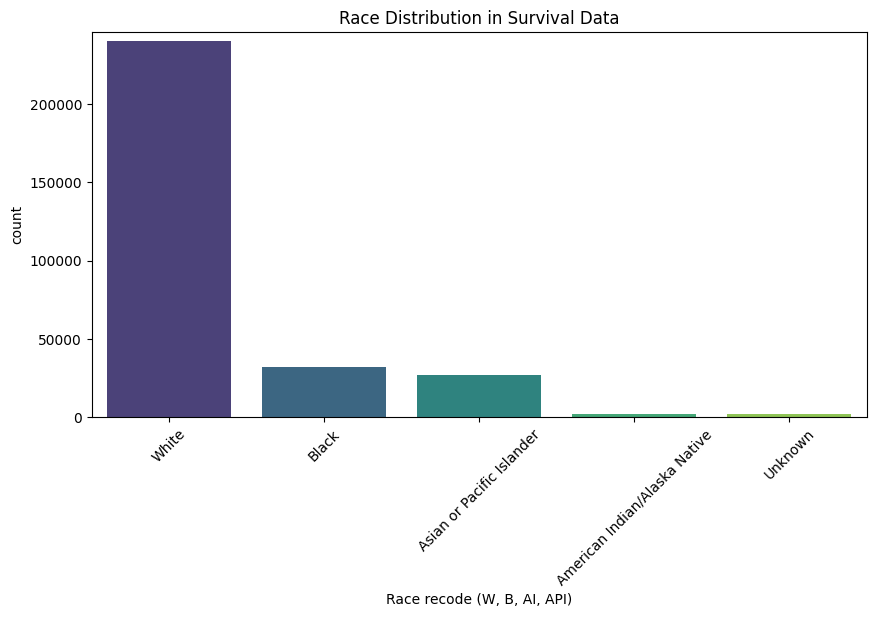

Survival rate percenetage :
      Race recode (W, B, AI, API)   count  percentage
0  American Indian/Alaska Native    1933    0.636783
1      Asian or Pacific Islander   27061    8.914635
2                          Black   32165   10.596033
3                        Unknown    1814    0.597581
4                          White  240584   79.254967


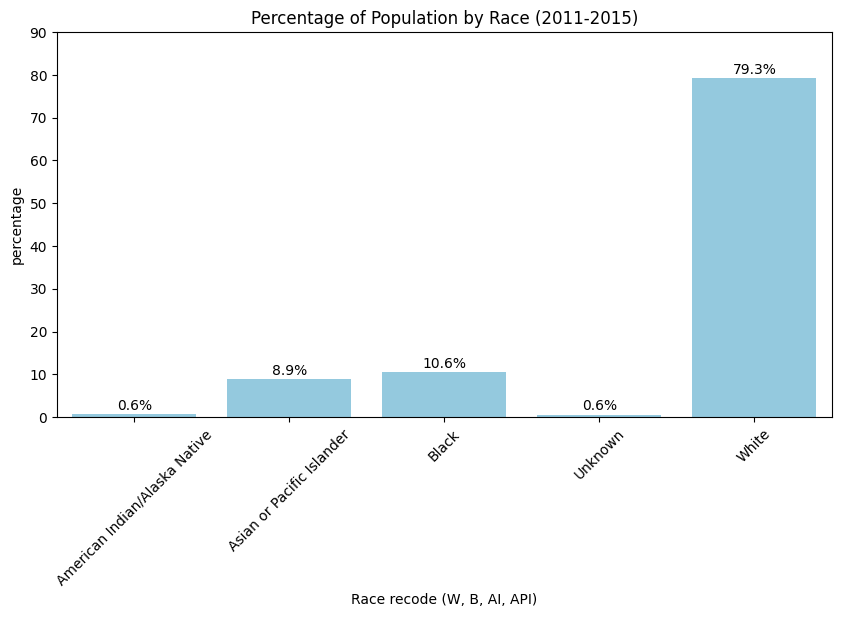

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3783601508.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



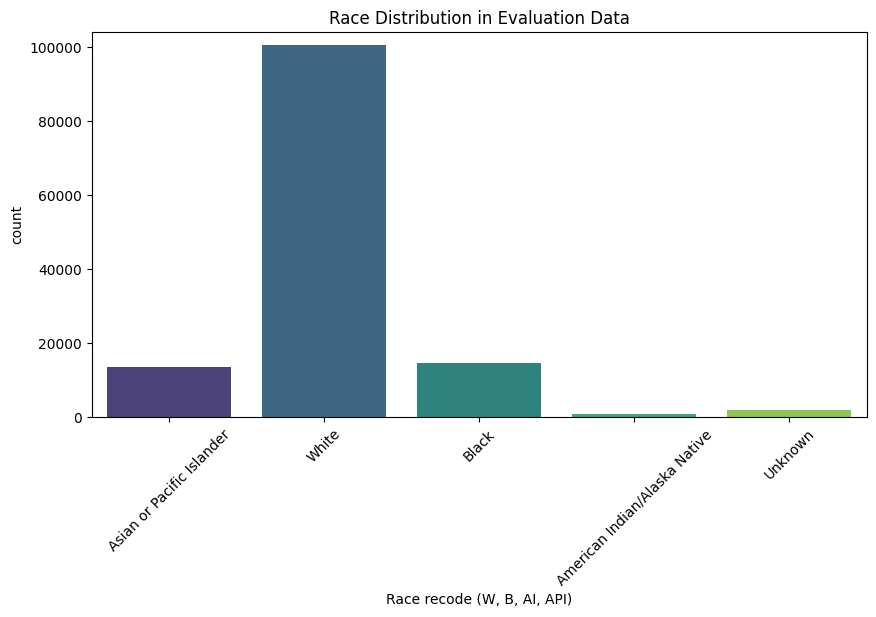

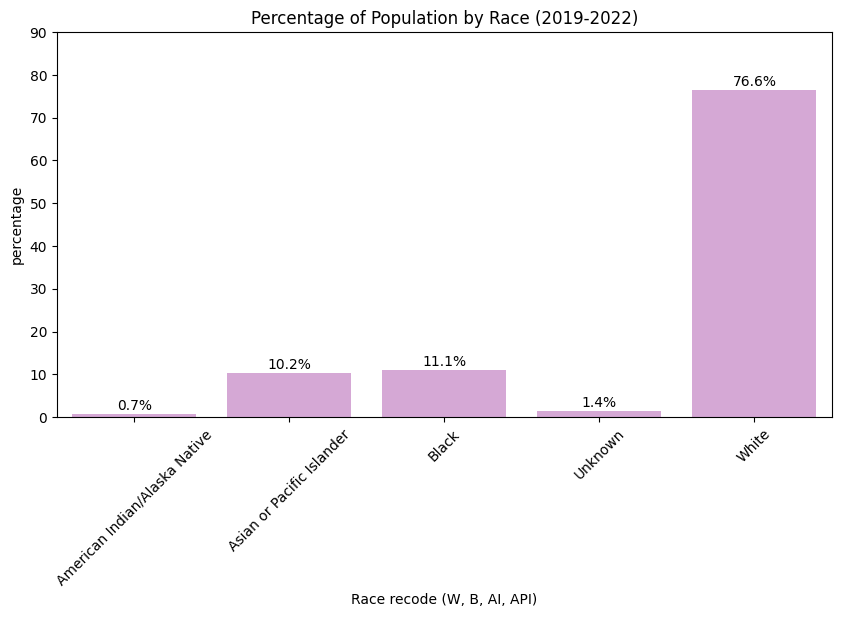

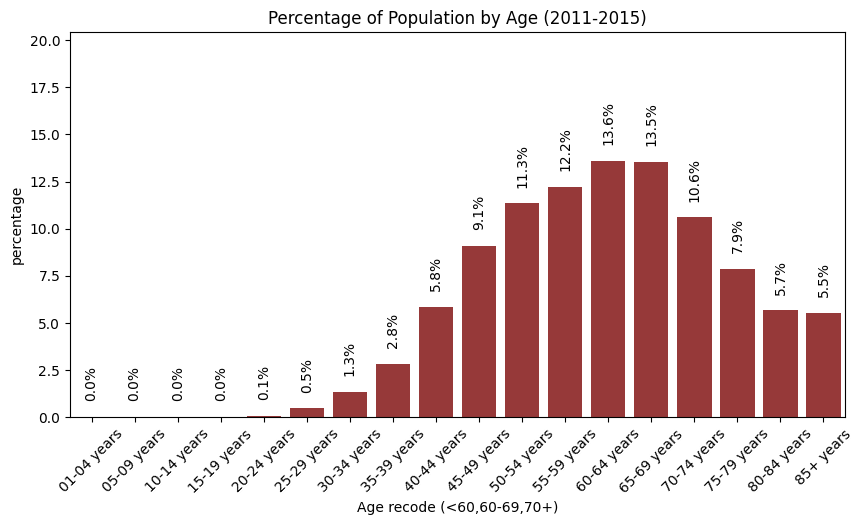

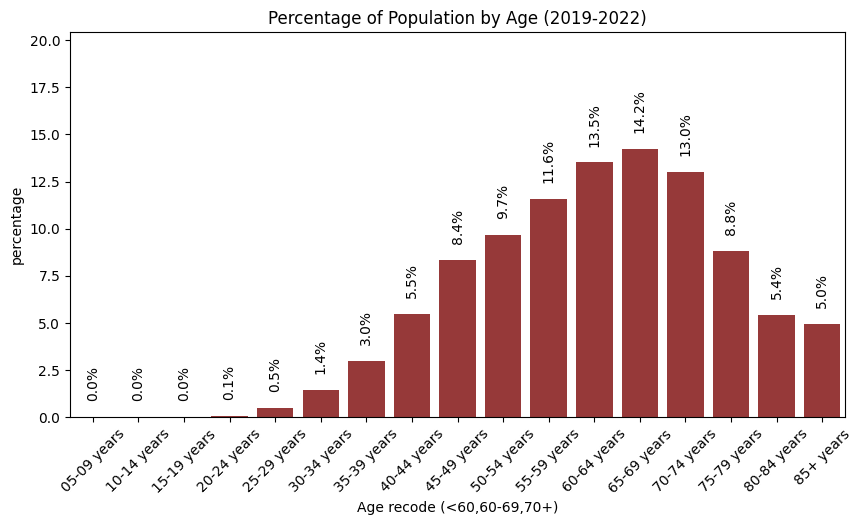

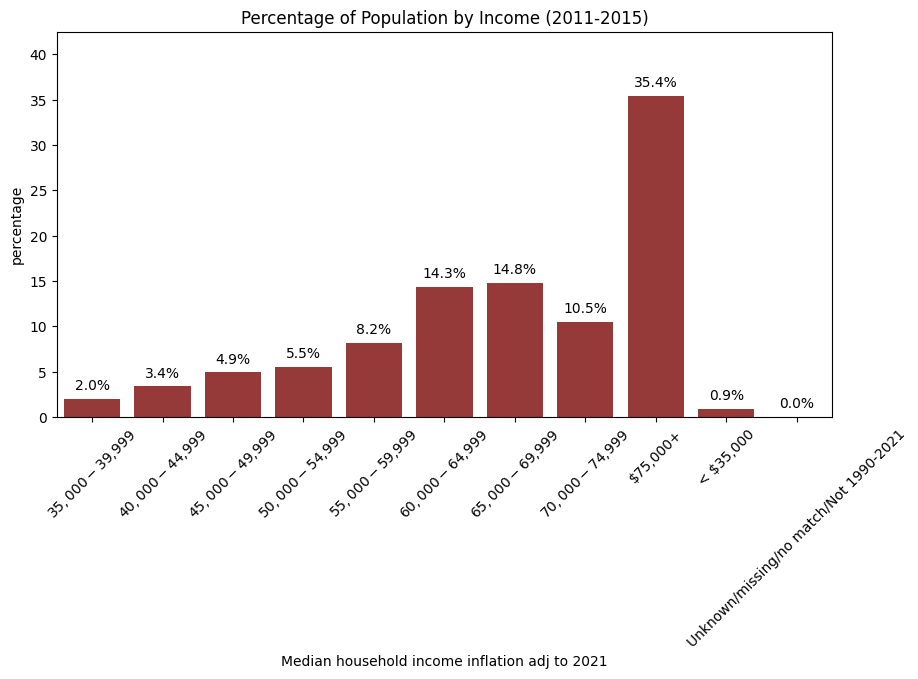

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Find column names
DF_col_names = BREAST_DF_surv.columns

# Plot race information
plt.figure(figsize=(10, 5))
sns.countplot(data=BREAST_DF_surv, x='Race recode (W, B, AI, API)', palette='viridis')
plt.xticks(rotation=45)
plt.ylim(0, 246000)
plt.title('Race Distribution in Survival Data')
plt.show()

# Calculate percentage of race for survival data
BREAST_DF_perc_surv = BREAST_DF_surv.groupby('Race recode (W, B, AI, API)').size().reset_index(name='count')
BREAST_DF_perc_surv['percentage'] = (BREAST_DF_perc_surv['count'] / BREAST_DF_perc_surv['count'].sum()) * 100

print("Survival rate percenetage :\n", BREAST_DF_perc_surv)
# Plot percentages
plt.figure(figsize=(10, 5))
sns.barplot(data=BREAST_DF_perc_surv, x='Race recode (W, B, AI, API)', y='percentage', color='skyblue')
for index, row in BREAST_DF_perc_surv.iterrows():
    plt.text(index, row.percentage + 1, f"{row.percentage:.1f}%", ha='center')
plt.xticks(rotation=45)
plt.ylim(0, 90)
plt.title('Percentage of Population by Race (2011-2015)')
plt.show()

# Repeat for Evaluation data
plt.figure(figsize=(10, 5))
sns.countplot(data=BREAST_DF_eval, x='Race recode (W, B, AI, API)', palette='viridis')
plt.xticks(rotation=45)
plt.ylim(0, 104000)
plt.title('Race Distribution in Evaluation Data')
plt.show()

BREAST_DF_perc_eval = BREAST_DF_eval.groupby('Race recode (W, B, AI, API)').size().reset_index(name='count')
BREAST_DF_perc_eval['percentage'] = (BREAST_DF_perc_eval['count'] / BREAST_DF_perc_eval['count'].sum()) * 100

plt.figure(figsize=(10, 5))
sns.barplot(data=BREAST_DF_perc_eval, x='Race recode (W, B, AI, API)', y='percentage', color='plum')
for index, row in BREAST_DF_perc_eval.iterrows():
    plt.text(index, row.percentage + 1, f"{row.percentage:.1f}%", ha='center')
plt.xticks(rotation=45)
plt.ylim(0, 90)
plt.title('Percentage of Population by Race (2019-2022)')
plt.show()

# Analyze age distribution
BREAST_DF_age_perc_surv = BREAST_DF_surv.groupby('Age recode (<60,60-69,70+)').size().reset_index(name='count')
BREAST_DF_age_perc_surv['percentage'] = (BREAST_DF_age_perc_surv['count'] / BREAST_DF_age_perc_surv['count'].sum()) * 100

perc_max = BREAST_DF_age_perc_surv['percentage'].max()

plt.figure(figsize=(10, 5))
sns.barplot(data=BREAST_DF_age_perc_surv, x='Age recode (<60,60-69,70+)', y='percentage', color='brown')
for index, row in BREAST_DF_age_perc_surv.iterrows():
    plt.text(index, row.percentage + 1, f"{row.percentage:.1f}%", ha='center', rotation=90)
plt.xticks(rotation=45)
plt.ylim(0, 1.5 * perc_max)
plt.title('Percentage of Population by Age (2011-2015)')
plt.show()

# Repeat for Evaluation data
BREAST_DF_age_perc_eval = BREAST_DF_eval.groupby('Age recode (<60,60-69,70+)').size().reset_index(name='count')
BREAST_DF_age_perc_eval['percentage'] = (BREAST_DF_age_perc_eval['count'] / BREAST_DF_age_perc_eval['count'].sum()) * 100

plt.figure(figsize=(10, 5))
sns.barplot(data=BREAST_DF_age_perc_eval, x='Age recode (<60,60-69,70+)', y='percentage', color='brown')
for index, row in BREAST_DF_age_perc_eval.iterrows():
    plt.text(index, row.percentage + 1, f"{row.percentage:.1f}%", ha='center', rotation=90)
plt.xticks(rotation=45)
plt.ylim(0, 1.5 * perc_max)
plt.title('Percentage of Population by Age (2019-2022)')
plt.show()

# Household income analysis
BREAST_DF_income_perc_surv = BREAST_DF_surv.groupby('Median household income inflation adj to 2021').size().reset_index(name='count')
BREAST_DF_income_perc_surv['percentage'] = (BREAST_DF_income_perc_surv['count'] / BREAST_DF_income_perc_surv['count'].sum()) * 100

perc_max = BREAST_DF_income_perc_surv['percentage'].max()

plt.figure(figsize=(10, 5))
sns.barplot(data=BREAST_DF_income_perc_surv, x='Median household income inflation adj to 2021', y='percentage', color='brown')
for index, row in BREAST_DF_income_perc_surv.iterrows():
    plt.text(index, row.percentage + 1, f"{row.percentage:.1f}%", ha='center')
plt.xticks(rotation=45)
plt.ylim(0, 1.2 * perc_max)
plt.title('Percentage of Population by Income (2011-2015)')
plt.show()


In [12]:
# BREAST_DF_surv is a pandas DataFrame
BREAST_DF_surv['COD'] = BREAST_DF_surv['COD to site recode'].apply(
    lambda x: x if x in ["Alive", "Breast"] else "Other"
)

## Results of the exploratory data analysis

In this section, we look into some exploratory data analysis such as

-   Cause of death of those who have had cancer

-   Total number of tumors (Malignant or Benign)

-   Radiation and chemotherapy

-   Surgery Performed

-   Marital Status

-   Household income

We looked into the population and then among the population how many
survived the cancer. Later we will run some analyses to see whether
those were important or deciding factors or not.

      COD   count  Total Count  Population
0   Alive  228221       303557       75.18
1  Breast   38472       303557       12.67
2   Other   36864       303557       12.14
    Total number of in situ/malignant tumors for patient  Population  \
0                                                 1.0         217122   
1                                                 2.0          68082   
2                                                 3.0          14579   
3                                                 4.0           2996   
4                                                 5.0            595   
5                                                 6.0            126   
6                                                 7.0             29   
7                                                 8.0             18   
8                                                 9.0              1   
9                                                10.0              1   
10                                  

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1406770128.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




  Radiation_Chemo  Population  Event_Population  Group % in total  Death %
0   No/No/Unknown      107012             15684             35.25    14.66
1          No/Yes       54966              9929             18.11    18.06
2  Yes/No/Unknown       79926              3731             26.33     4.67
3         Yes/Yes       61653              9128             20.31    14.81
                   Reason no cancer-directed surgery  Population  \
0  Not performed, patient died prior to recommend...         278   
1                                    Not recommended       23199   
2  Not recommended, contraindicated due to other ...        1356   
3     Recommended but not performed, patient refused        2608   
4      Recommended but not performed, unknown reason        1604   
5                  Recommended, unknown if performed        2649   
6                                  Surgery performed      269730   
7  Unknown; death certificate; or autopsy only (2...        2133   

   Event_Pop

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1406770128.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



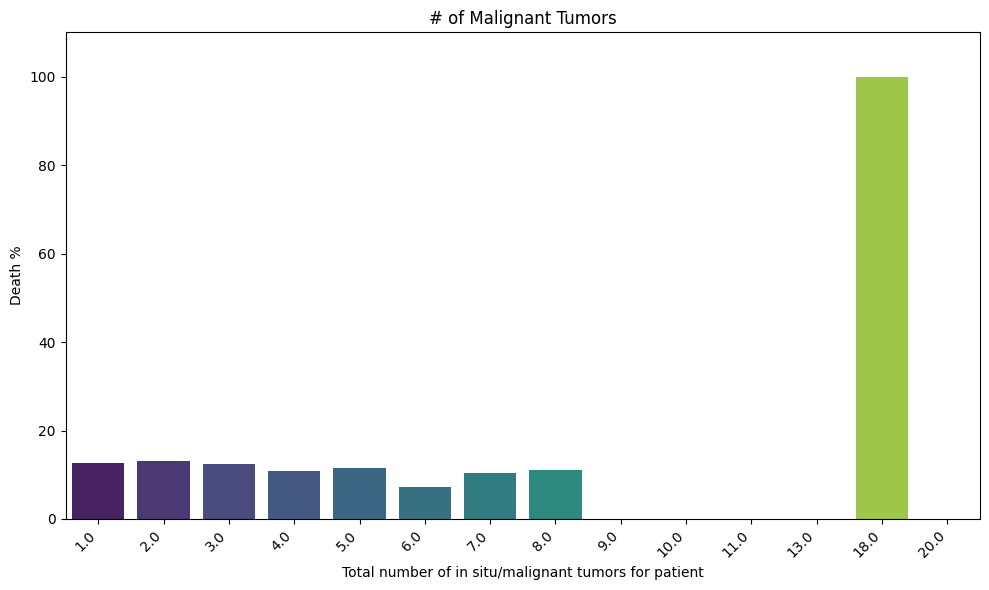

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1406770128.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



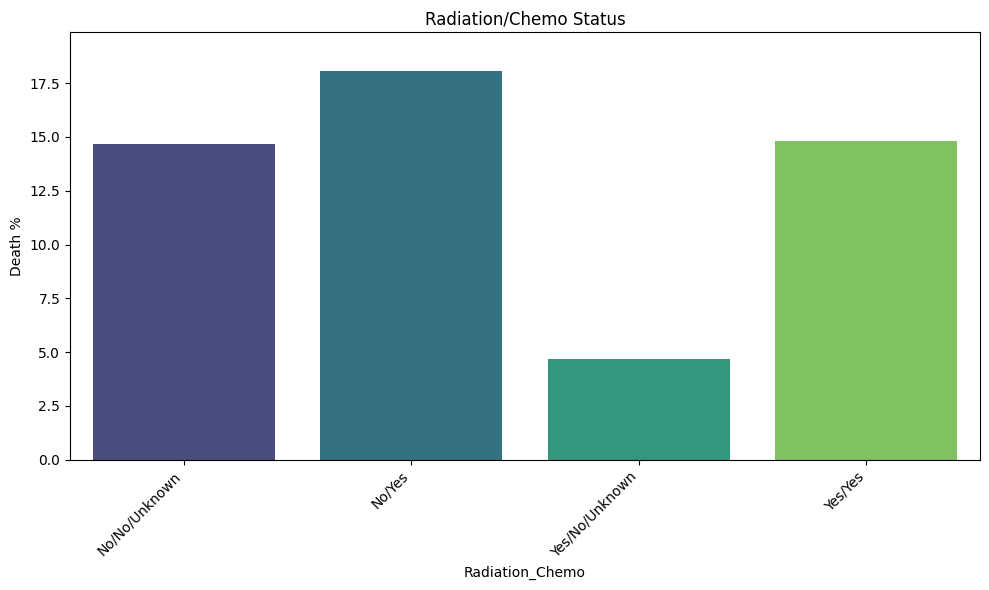

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1406770128.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



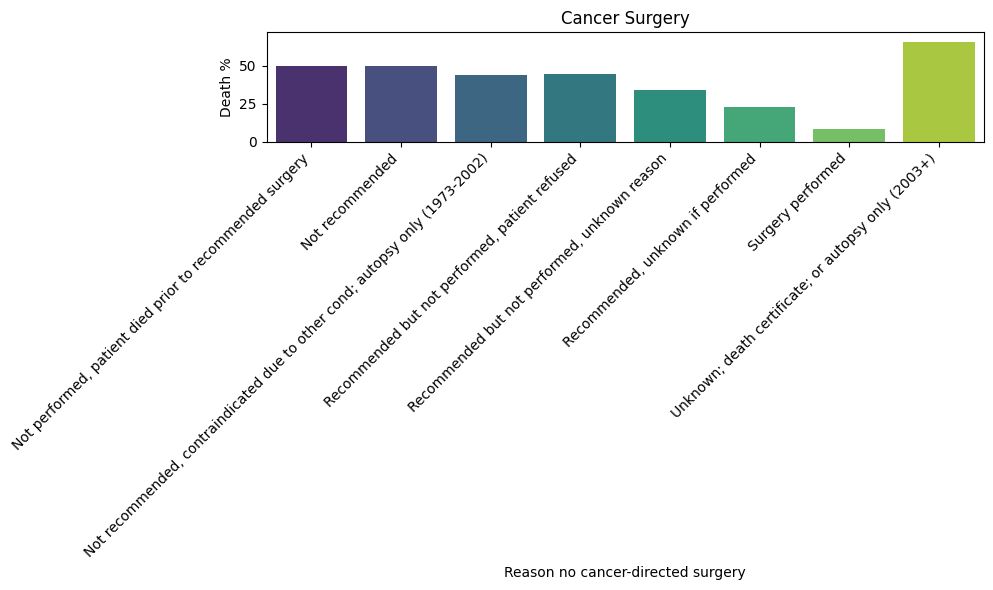

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1406770128.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



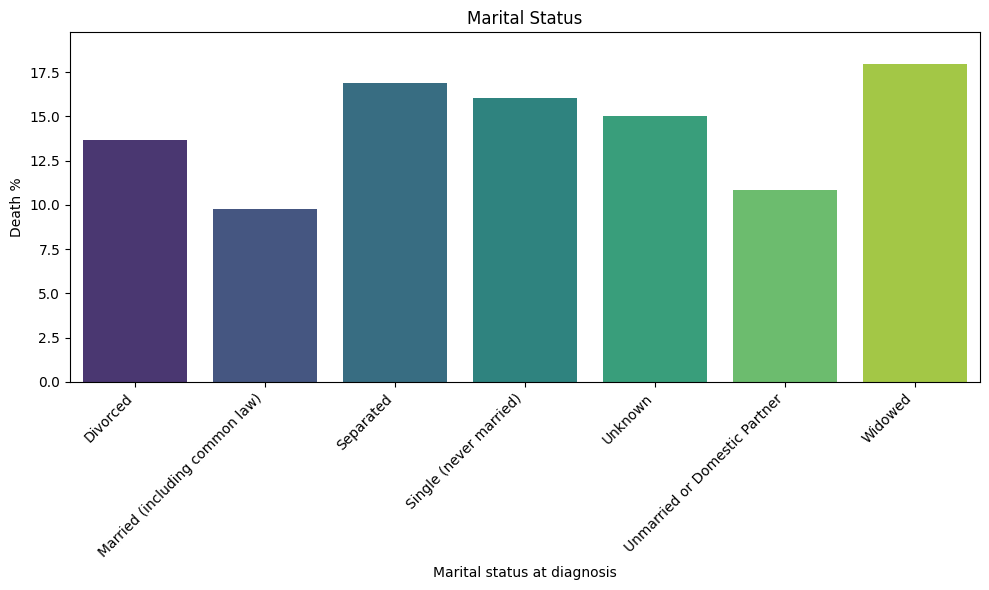

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1406770128.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



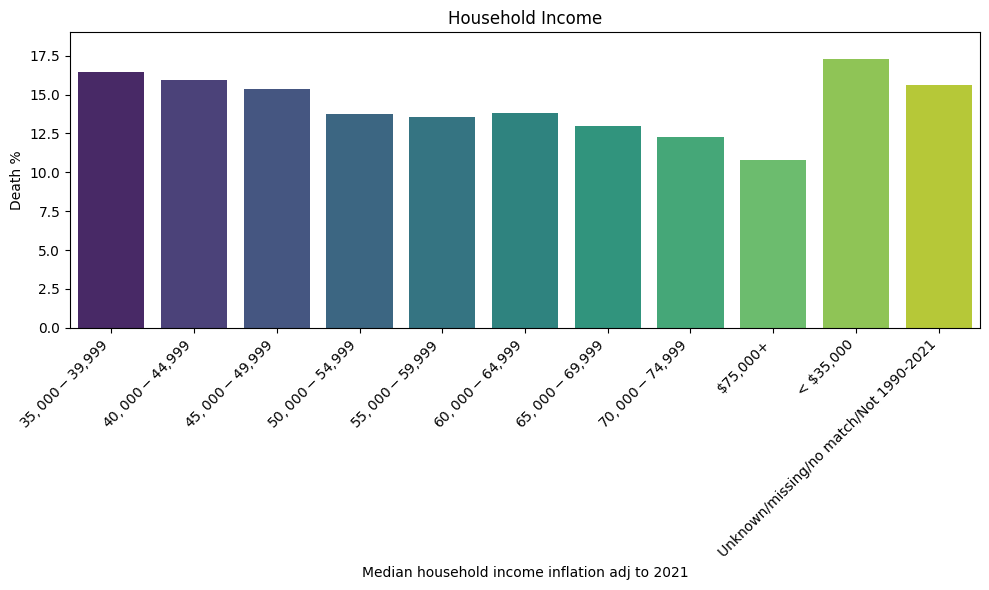

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1406770128.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



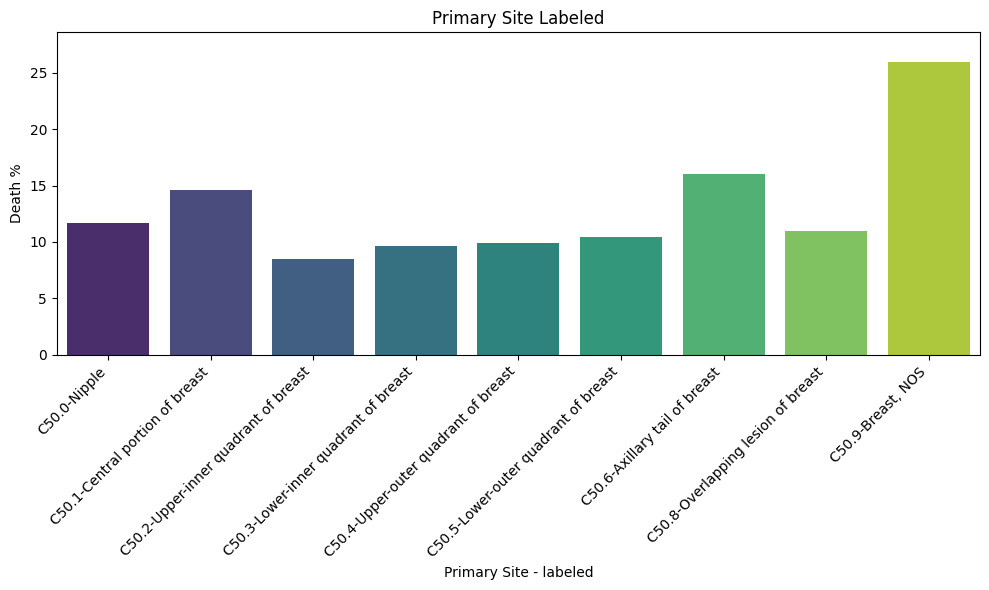

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming BREAST_DF_surv is already defined as a DataFrame

# COD analysis
BREAST_DF_COD_perc_surv = (BREAST_DF_surv.groupby('COD')
                            .size()
                            .reset_index(name='count'))
total_count = BREAST_DF_COD_perc_surv['count'].sum()
BREAST_DF_COD_perc_surv['Total Count'] = total_count
BREAST_DF_COD_perc_surv['Population'] = (BREAST_DF_COD_perc_surv['count'] / total_count * 100).round(2)

print(BREAST_DF_COD_perc_surv)

# Function to calculate percentages
def calculate_percentages(df, group_col, event_col='COD', event_value='Breast'):
    """
    Calculates group percentage and death percentage for a given DataFrame.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        group_col (str): The column to group by.
        event_col (str): The column indicating the event (e.g., cause of death).
        event_value (str): The value indicating the specific event of interest (e.g., 'Breast').
        
    Returns:
        pd.DataFrame: The DataFrame with added 'Group % in total' and 'Death %' columns.
    """
    # Calculate total population for each group
    grouped = df.groupby(group_col).size().reset_index(name='Population')
    
    # Calculate number of events (e.g., deaths due to breast cancer) for each group
    event_counts = df[df[event_col] == event_value].groupby(group_col).size().reset_index(name='Event_Population')
    
    # Merge population and event counts
    merged = pd.merge(grouped, event_counts, on=group_col, how='left').fillna(0)
    
    # Calculate group percentage
    merged['Group % in total'] = (merged['Population'] / merged['Population'].sum() * 100).round(2)
    
    # Calculate death percentage
    merged['Death %'] = (merged['Event_Population'] / merged['Population'] * 100).round(2)
    
    return merged

# Number of tumors analysis
BREAST_DF_TNoT_perc_surv = calculate_percentages(
    df=BREAST_DF_surv,
    group_col='Total number of in situ/malignant tumors for patient'
)
print(BREAST_DF_TNoT_perc_surv)

# Treatment analysis
BREAST_DF_surv['Radiation'] = np.where(BREAST_DF_surv['Radiation recode'].isin(
    ["None/Unknown", "Refused (1988+)", "Recommended, unknown if administered"]), 
    "No", "Yes")

# Fill missing values in 'Chemotherapy recode (yes, no/unk)' with a default value like 'No'
BREAST_DF_surv['Chemotherapy recode (yes, no/unk)'].fillna('No', inplace=True)

BREAST_DF_RNC_perc_surv = (
    BREAST_DF_surv
    .groupby(['Radiation', 'Chemotherapy recode (yes, no/unk)'])
    .size()
    .reset_index(name='Population')
)

breast_cancer_deaths = (
    BREAST_DF_surv[BREAST_DF_surv['COD'] == 'Breast']
    .groupby(['Radiation', 'Chemotherapy recode (yes, no/unk)'])
    .size()
    .reset_index(name='Event_Population')
)

BREAST_DF_RNC_perc_surv = pd.merge(BREAST_DF_RNC_perc_surv, breast_cancer_deaths, on=['Radiation', 'Chemotherapy recode (yes, no/unk)'], how='left').fillna(0)


BREAST_DF_RNC_perc_surv['Radiation_Chemo'] = BREAST_DF_RNC_perc_surv['Radiation'] + '/' + BREAST_DF_RNC_perc_surv['Chemotherapy recode (yes, no/unk)']
BREAST_DF_RNC_perc_surv = BREAST_DF_RNC_perc_surv[['Radiation_Chemo', 'Population', 'Event_Population']]
BREAST_DF_RNC_perc_surv['Group % in total'] = (BREAST_DF_RNC_perc_surv['Population'] / BREAST_DF_RNC_perc_surv['Population'].sum() * 100).round(2)
BREAST_DF_RNC_perc_surv['Death %'] = (BREAST_DF_RNC_perc_surv['Event_Population'] / BREAST_DF_RNC_perc_surv['Population'] * 100).round(2)

print(BREAST_DF_RNC_perc_surv)

# Surgery analysis
BREAST_DF_SUR_perc_surv = calculate_percentages(
    df=BREAST_DF_surv,
    group_col='Reason no cancer-directed surgery'
)
print(BREAST_DF_SUR_perc_surv)

# Marital status analysis
BREAST_DF_MARI_perc_surv = calculate_percentages(
    df=BREAST_DF_surv,
    group_col='Marital status at diagnosis'
)
print(BREAST_DF_MARI_perc_surv)

# Household income analysis
BREAST_DF_HHI_perc_surv = calculate_percentages(
    df=BREAST_DF_surv,
    group_col='Median household income inflation adj to 2021'
)
print(BREAST_DF_HHI_perc_surv)

# Primary site analysis
BREAST_DF_PSL_perc_surv = calculate_percentages(
    df=BREAST_DF_surv,
    group_col='Primary Site - labeled'
)
print(BREAST_DF_PSL_perc_surv)

def plot_data(df, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df.iloc[:, 0], y='Death %', data=df, palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Death %')
    plt.xlabel(df.columns[0])
    plt.tight_layout()
    
    # Dynamically adjust the y-axis limit
    max_death_percentage = df['Death %'].max()
    plt.ylim(0, max_death_percentage * 1.1)  # Extend the upper limit by 10% for better visualization
    
    plt.show()

# List of DataFrames and titles to plot
dataframes = [
    (BREAST_DF_TNoT_perc_surv, "# of Malignant Tumors"),
    (BREAST_DF_RNC_perc_surv, "Radiation/Chemo Status"),
    (BREAST_DF_SUR_perc_surv, "Cancer Surgery"),
    (BREAST_DF_MARI_perc_surv, "Marital Status"),
    (BREAST_DF_HHI_perc_surv, "Household Income"),
    (BREAST_DF_PSL_perc_surv, "Primary Site Labeled")
]

# Plot all dataframes
for df, title in dataframes:
    plot_data(df, title)


## Correlation investigation

In this section we will be using different Pythob packages to perform correlation and other analyses on the data, to do so, we first need to slightly change our data to make them suitable for packages.

The first step is to change the categorical data to factor in columns that they exist. Then we use Fisher exact test for different variables. 

The strategy is to find the one with the highest effect in theory, the code will calculate the p-values from Fisher's exact test for independence between each categorical variable and the `COD` (Cause
of death) column. The lower the p-value, the stronger the evidence against the null hypothesis of independence, suggesting a significant association between the variable and `COD`. Then we simplify the model by keeping the most relevant, we also need to look into **homoscedasticity** and remove those that may contribute to.

Then we explore the data, there are some column than can be eliminated from this analyses. i.e., year, race (there are two), and so on. The following bullets lists those that are eliminated in the next steps of
analyses.
-   Sex, Year of diagnosis,
-   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic), due to
    collonearity with `Race Recode`
-   Site recode ICD-O-3/WHO 2008, Site recode ICD-O-3 2023 Revision,
    Diagnostic Confirmation, Survival months flag, COD to site recode
    (replaced with COD), Patient ID, Year of follow-up recode, Year of
    death recode, SEER other cause of death classification, RX
    Summ--Systemic/Sur Seq (2007+), Origin recode NHIA (Hispanic,
    Non-Hisp)

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact

# Assuming BREAST_DF_surv and BREAST_DF_eval are already defined as pandas DataFrames

# 1. Data Cleaning and Preparation
# List of columns to remove
uncritical_column = ["Sex", "Year of diagnosis",
                       "Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",
                       "Site recode ICD-O-3/WHO 2008", "Site recode ICD-O-3 2023 Revision",
                       "Diagnostic Confirmation, Survival months flag", "COD to site recode",
                       "Patient ID", "Year of follow-up recode", "Year of death recode",
                       "SEER other cause of death classification",
                       "RX Summ--Systemic/Sur Seq (2007+)",
                       "Origin recode NHIA (Hispanic, Non-Hisp)",
                       "Race and origin (recommended by SEER)",
                       "Diagnostic Confirmation",
                       "Sequence number", "Radiation recode"]

# Create BREAST_DF_surv_clean by removing uncritical columns
BREAST_DF_surv_clean = BREAST_DF_surv.drop(columns=[col for col in uncritical_column if col in BREAST_DF_surv.columns], errors='ignore')
BREAST_DF_eval_clean = BREAST_DF_eval.drop(columns=[col for col in uncritical_column if col in BREAST_DF_eval.columns], errors='ignore')

# Identify object (character) and numeric columns
char_cols = BREAST_DF_surv_clean.select_dtypes(include=['object']).columns
num_cols = BREAST_DF_surv_clean.select_dtypes(include=np.number).columns
char_cols_e = BREAST_DF_eval_clean.select_dtypes(include=['object']).columns

# Convert object columns to categorical
BREAST_DF_surv_clean[char_cols] = BREAST_DF_surv_clean[char_cols].astype('category')
BREAST_DF_eval_clean[char_cols_e] = BREAST_DF_eval_clean[char_cols_e].astype('category')

# Check for variables with only one level
one_level_vars = []
for col in BREAST_DF_surv_clean.columns:
    if len(BREAST_DF_surv_clean[col].unique()) == 1:
        one_level_vars.append(col)

# Remove variables with only one level from the data frame
BREAST_DF_surv_clean = BREAST_DF_surv_clean.drop(columns=[col for col in one_level_vars if col in BREAST_DF_surv_clean.columns], errors='ignore')
BREAST_DF_eval_clean = BREAST_DF_eval_clean.drop(columns=[col for col in one_level_vars if col in BREAST_DF_eval_clean.columns], errors='ignore')


# 2. Chi-squared/Fisher-Exact Test Analysis
def fisher_exact_cal(var, data):
    """Calculates Fisher's exact test p-value for independence."""
    try:
        tab = pd.crosstab(data['COD'], data[var])
        # Check if any expected frequencies are less than or equal to 5
        if np.any(chi2_contingency(tab)[3] <= 5):
            fisher_result = fisher_exact(tab, alternative='two-sided')
            p_value = fisher_result.pvalue
        else:
            # Calculate chi-squared statistic
            chi2, p, dof, expected = chi2_contingency(tab)
            p_value = p
        return p_value
    except ValueError:  # Handle cases where the table is not 2x2
        return np.nan  # Return NaN if Fisher's exact test cannot be performed

# Initialize an empty dictionary to store p-values
p_values = {}

# Number of bootstrap samples
n_bootstrap = 50

# Loop over each column in the dataframe
for col in BREAST_DF_surv_clean.columns:
    # Check if the column is categorical
    if pd.api.types.is_categorical_dtype(BREAST_DF_surv_clean[col]):
        # Initialize an empty list to store p-values from bootstrap samples
        bootstrap_p_values = []

        # Perform bootstrap sampling and calculate Fisher's exact p-value for each sample
        for i in range(n_bootstrap):
            # Generate a bootstrap sample with replacement
            bootstrap_data = BREAST_DF_surv_clean.sample(frac=0.05, replace=True)

            # Calculate Fisher's exact p-value for the bootstrap sample
            p_value = fisher_exact_cal(col, bootstrap_data)
            if p_value is not None:
                bootstrap_p_values.append(p_value)

        # Calculate the mean p-value from bootstrap samples
        if bootstrap_p_values:
            mean_p_value = np.mean(bootstrap_p_values)
        else:
            mean_p_value = np.nan

        # Store the mean p-value for the column
        p_values[col] = mean_p_value

# Convert the dictionary of p-values to a data frame
p_values_df = pd.DataFrame(list(p_values.items()), columns=['variable', 'p_value'])

# Sort the results by p-values
sorted_results = p_values_df.sort_values(by='p_value', na_position='last')

# Handle NaN values by replacing them with a placeholder (e.g., -1)
sorted_results['p_value'] = sorted_results['p_value'].fillna(-1)

# Print the sorted p-values
print(sorted_results)


C:\Users\kohya\AppData\Local\Temp\ipykernel_47956\1894102586.py:71: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_47956\1894102586.py:71: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_47956\1894102586.py:71: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_47956\1894102586.py:71: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_47956\1894102586.py:71: DeprecationWarning: is_categorical_dtype is deprecated and will be remov

                                         variable       p_value
12                                            COD  0.000000e+00
1                          Primary Site - labeled  4.898097e-77
13                                      Radiation  4.100056e-75
4               Chemotherapy recode (yes, no/unk)  3.775760e-68
7               First malignant primary indicator  1.035236e-33
0                     Race recode (W, B, AI, API)  1.443156e-20
2                        Grade Recode (thru 2017) -1.000000e+00
3                                      Laterality -1.000000e+00
5               Reason no cancer-directed surgery -1.000000e+00
6                            Survival months flag -1.000000e+00
8                     Marital status at diagnosis -1.000000e+00
9   Median household income inflation adj to 2021 -1.000000e+00
10                     Rural-Urban Continuum Code -1.000000e+00
11                     Age recode (<60,60-69,70+) -1.000000e+00


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, fisher_exact

# Assuming BREAST_DF_surv and BREAST_DF_eval are already defined as pandas DataFrames

# 1. Data Cleaning and Preparation
# List of columns to remove
uncritical_column = ["Sex", "Year of diagnosis",
                       "Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",
                       "Site recode ICD-O-3/WHO 2008", "Site recode ICD-O-3 2023 Revision",
                       "Diagnostic Confirmation, Survival months flag", "COD to site recode",
                       "Patient ID", "Year of follow-up recode", "Year of death recode",
                       "SEER other cause of death classification",
                       "RX Summ--Systemic/Sur Seq (2007+)",
                       "Origin recode NHIA (Hispanic, Non-Hisp)",
                       "Race and origin (recommended by SEER)",
                       "Diagnostic Confirmation",
                       "Sequence number", "Radiation recode"]

# Create BREAST_DF_surv_clean by removing uncritical columns
BREAST_DF_surv_clean = BREAST_DF_surv.drop(columns=[col for col in uncritical_column if col in BREAST_DF_surv.columns], errors='ignore')
BREAST_DF_eval_clean = BREAST_DF_eval.drop(columns=[col for col in uncritical_column if col in BREAST_DF_eval.columns], errors='ignore')

# Identify object (character) and numeric columns
char_cols = BREAST_DF_surv_clean.select_dtypes(include=['object']).columns
num_cols = BREAST_DF_surv_clean.select_dtypes(include=np.number).columns
char_cols_e = BREAST_DF_eval_clean.select_dtypes(include=['object']).columns

# Convert object columns to categorical
BREAST_DF_surv_clean[char_cols] = BREAST_DF_surv_clean[char_cols].astype('category')
BREAST_DF_eval_clean[char_cols_e] = BREAST_DF_eval_clean[char_cols_e].astype('category')

# Identify object (character) and numeric columns
char_cols = BREAST_DF_surv.select_dtypes(include=['object']).columns
num_cols = BREAST_DF_surv.select_dtypes(include=np.number).columns
char_cols_e = BREAST_DF_eval.select_dtypes(include=['object']).columns

# Convert object columns to categorical
BREAST_DF_surv[char_cols] = BREAST_DF_surv[char_cols].astype('category')
BREAST_DF_eval[char_cols_e] = BREAST_DF_eval[char_cols_e].astype('category')

# Check for variables with only one level
one_level_vars = []
for col in BREAST_DF_surv_clean.columns:
    if len(BREAST_DF_surv_clean[col].unique()) == 1:
        one_level_vars.append(col)

# Remove variables with only one level from the data frame
BREAST_DF_surv_clean = BREAST_DF_surv_clean.drop(columns=[col for col in one_level_vars if col in BREAST_DF_surv_clean.columns], errors='ignore')
BREAST_DF_eval_clean = BREAST_DF_eval_clean.drop(columns=[col for col in one_level_vars if col in BREAST_DF_eval_clean.columns], errors='ignore')
BREAST_DF_surv = BREAST_DF_surv.drop(columns=[col for col in one_level_vars if col in BREAST_DF_surv.columns], errors='ignore')
BREAST_DF_eval = BREAST_DF_eval.drop(columns=[col for col in one_level_vars if col in BREAST_DF_eval.columns], errors='ignore')


# Identify Critical vs. Non-Critical Columns
# Here, a "critical" column is defined as one that has a statistically significant
# association with the 'COD' (Cause of Death) variable.

def assess_column_criticality(df, alpha=0.05):
    """
    Assess the criticality of each column based on its association with 'COD'.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        alpha (float): Significance level for determining criticality.

    Returns:
        dict: A dictionary containing lists of critical and non-critical columns.
    """
    critical_columns = []
    non_critical_columns = []

    for col in df.columns:
        if col == 'COD':
            continue  # Skip the target variable itself

        if pd.api.types.is_categorical_dtype(df[col]):
            # Create contingency table
            contingency_table = pd.crosstab(df['COD'], df[col])

            # Check if any expected frequencies are less than or equal to 5
            if np.any(chi2_contingency(contingency_table)[3] <= 5):
                try:
                    # Perform Fisher's exact test
                    fisher_result = fisher_exact(contingency_table)
                    p_value = fisher_result.pvalue
                except ValueError:
                    # Handle cases where Fisher's exact test cannot be performed
                    print(f"Skipping {col} due to inability to perform Fisher's exact test.")
                    continue
            else:
                # Perform Chi-squared test
                chi2, p_value, _, _ = chi2_contingency(contingency_table)

            # Determine criticality based on p-value
            if p_value < alpha:
                critical_columns.append(col)
            else:
                non_critical_columns.append(col)

    return {'critical': critical_columns, 'non_critical': non_critical_columns}

# Assuming a significance level (alpha od 0.05)
alpha = 0.05

# Assess column criticality
criticality_results = assess_column_criticality(BREAST_DF_surv, alpha)

# Print critical and non-critical columns
print("Critical Columns (statistically significant association with COD):")
print(criticality_results['critical'])

print("\nNon-Critical Columns (no statistically significant association with COD):")
print(criticality_results['non_critical'])

# Assess column criticality
criticality_results = assess_column_criticality(BREAST_DF_surv_clean, alpha)

# Print critical and non-critical columns
print("Critical Columns (statistically significant association with COD):")
print(criticality_results['critical'])

print("\nNon-Critical Columns (no statistically significant association with COD):")
print(criticality_results['non_critical'])




C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in

Skipping Diagnostic Confirmation due to inability to perform Fisher's exact test.


C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in

Skipping COD to site recode due to inability to perform Fisher's exact test.
Skipping Sequence number due to inability to perform Fisher's exact test.


C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in

Skipping Age recode (<60,60-69,70+) due to inability to perform Fisher's exact test.
Skipping SEER other cause of death classification due to inability to perform Fisher's exact test.


C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in

Critical Columns (statistically significant association with COD):
['Race recode (W, B, AI, API)', 'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)', 'Primary Site - labeled', 'Grade Recode (thru 2017)', 'Laterality', 'Chemotherapy recode (yes, no/unk)', 'Radiation recode', 'Reason no cancer-directed surgery', 'Survival months flag', 'First malignant primary indicator', 'Marital status at diagnosis', 'Median household income inflation adj to 2021', 'Rural-Urban Continuum Code', 'Year of death recode', 'RX Summ--Systemic/Sur Seq (2007+)', 'Origin recode NHIA (Hispanic, Non-Hisp)', 'Radiation']

Non-Critical Columns (no statistically significant association with COD):
['Sex', 'Site recode ICD-O-3/WHO 2008', 'Site recode ICD-O-3 2023 Revision', 'Race and origin (recommended by SEER)']


C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in

Skipping Age recode (<60,60-69,70+) due to inability to perform Fisher's exact test.
Critical Columns (statistically significant association with COD):
['Race recode (W, B, AI, API)', 'Primary Site - labeled', 'Grade Recode (thru 2017)', 'Laterality', 'Chemotherapy recode (yes, no/unk)', 'Reason no cancer-directed surgery', 'Survival months flag', 'First malignant primary indicator', 'Marital status at diagnosis', 'Median household income inflation adj to 2021', 'Rural-Urban Continuum Code', 'Radiation']

Non-Critical Columns (no statistically significant association with COD):
[]


C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\3110132938.py:80: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in

In [16]:
BREAST_DF_surv_clean = BREAST_DF_surv.drop(columns=[col for col in criticality_results['non_critical'] if col in BREAST_DF_surv.columns], errors='ignore')
BREAST_DF_eval_clean = BREAST_DF_eval.drop(columns=[col for col in criticality_results['non_critical'] if col in BREAST_DF_eval.columns], errors='ignore')

In [18]:
BREAST_DF_surv_clean = BREAST_DF_surv.drop(columns=[col for col in uncritical_column if col in BREAST_DF_surv.columns], errors='ignore')
BREAST_DF_eval_clean = BREAST_DF_eval.drop(columns=[col for col in uncritical_column if col in BREAST_DF_eval.columns], errors='ignore')

### Correlation Analyses

In This section I used the existing Python package to calculate the correlations among the different columns and COD. We start first with separation the numerical and categorical data since they need to be treated separately in term of calculating the correlation with COD. We start by finding Pearson correlation coefficient between COD and the numerical column.

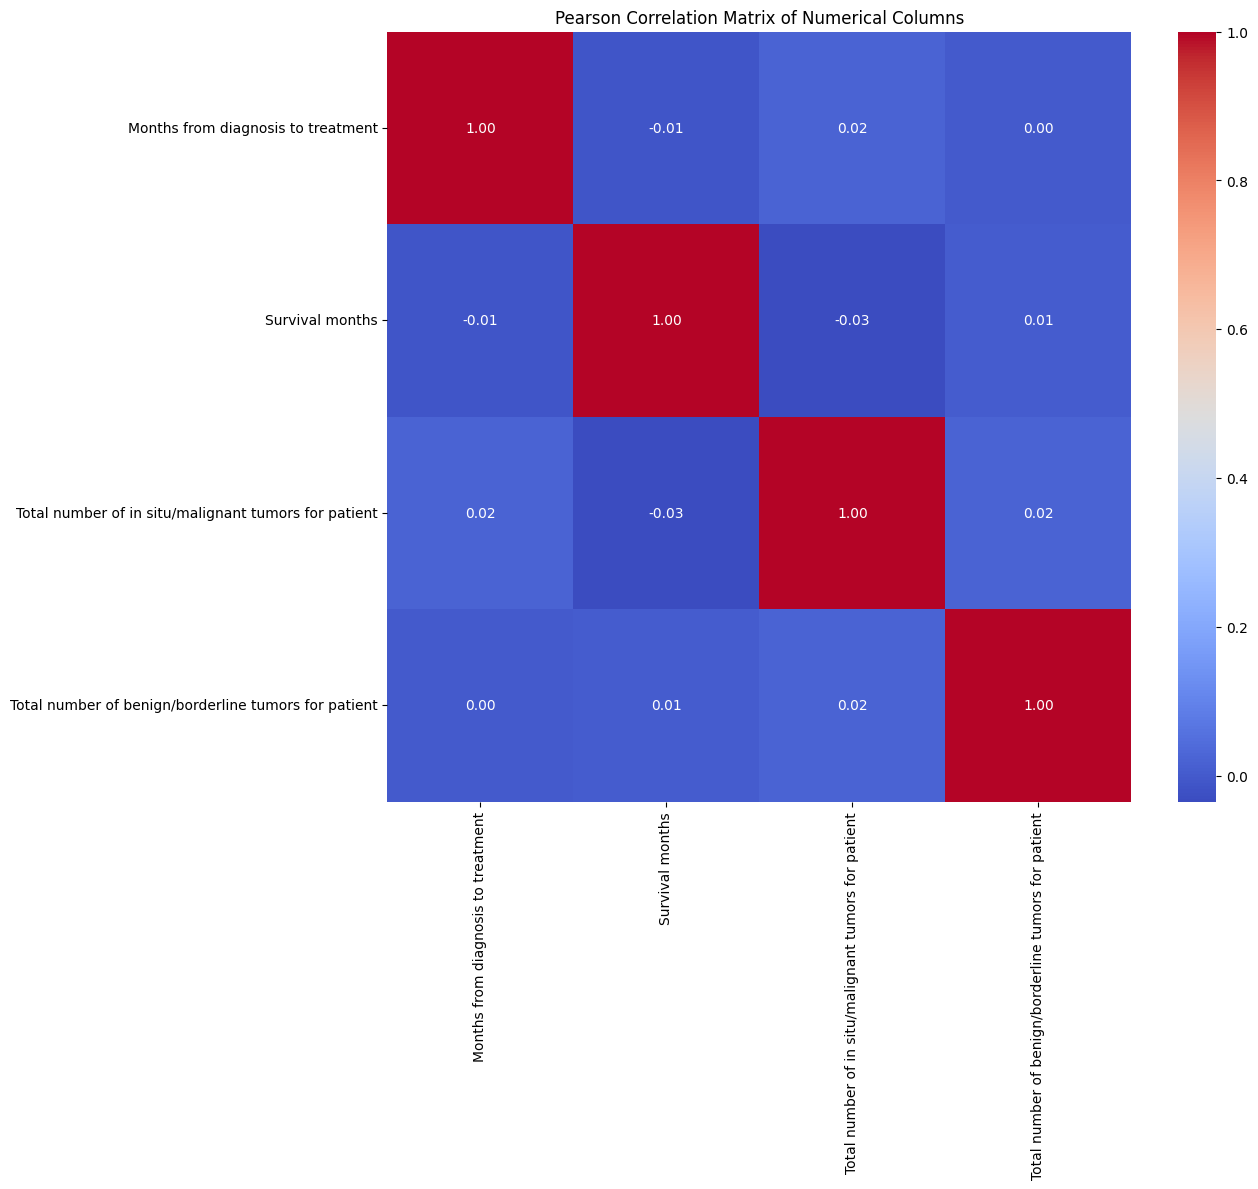

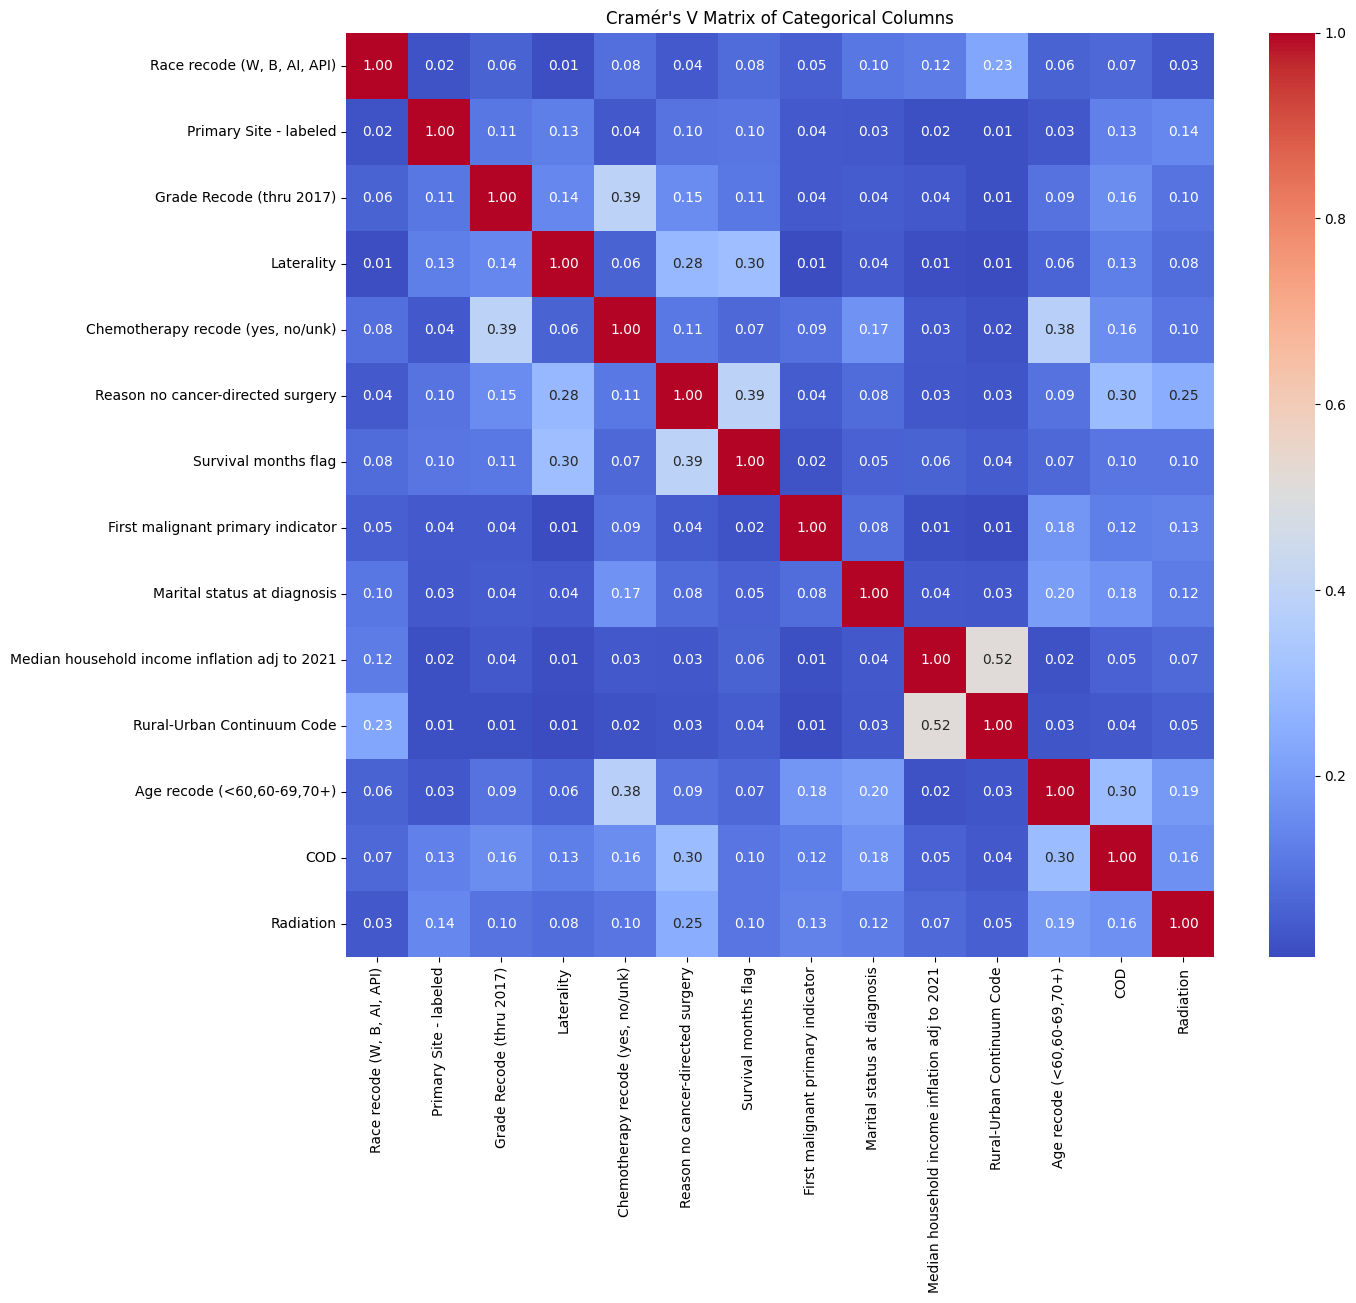

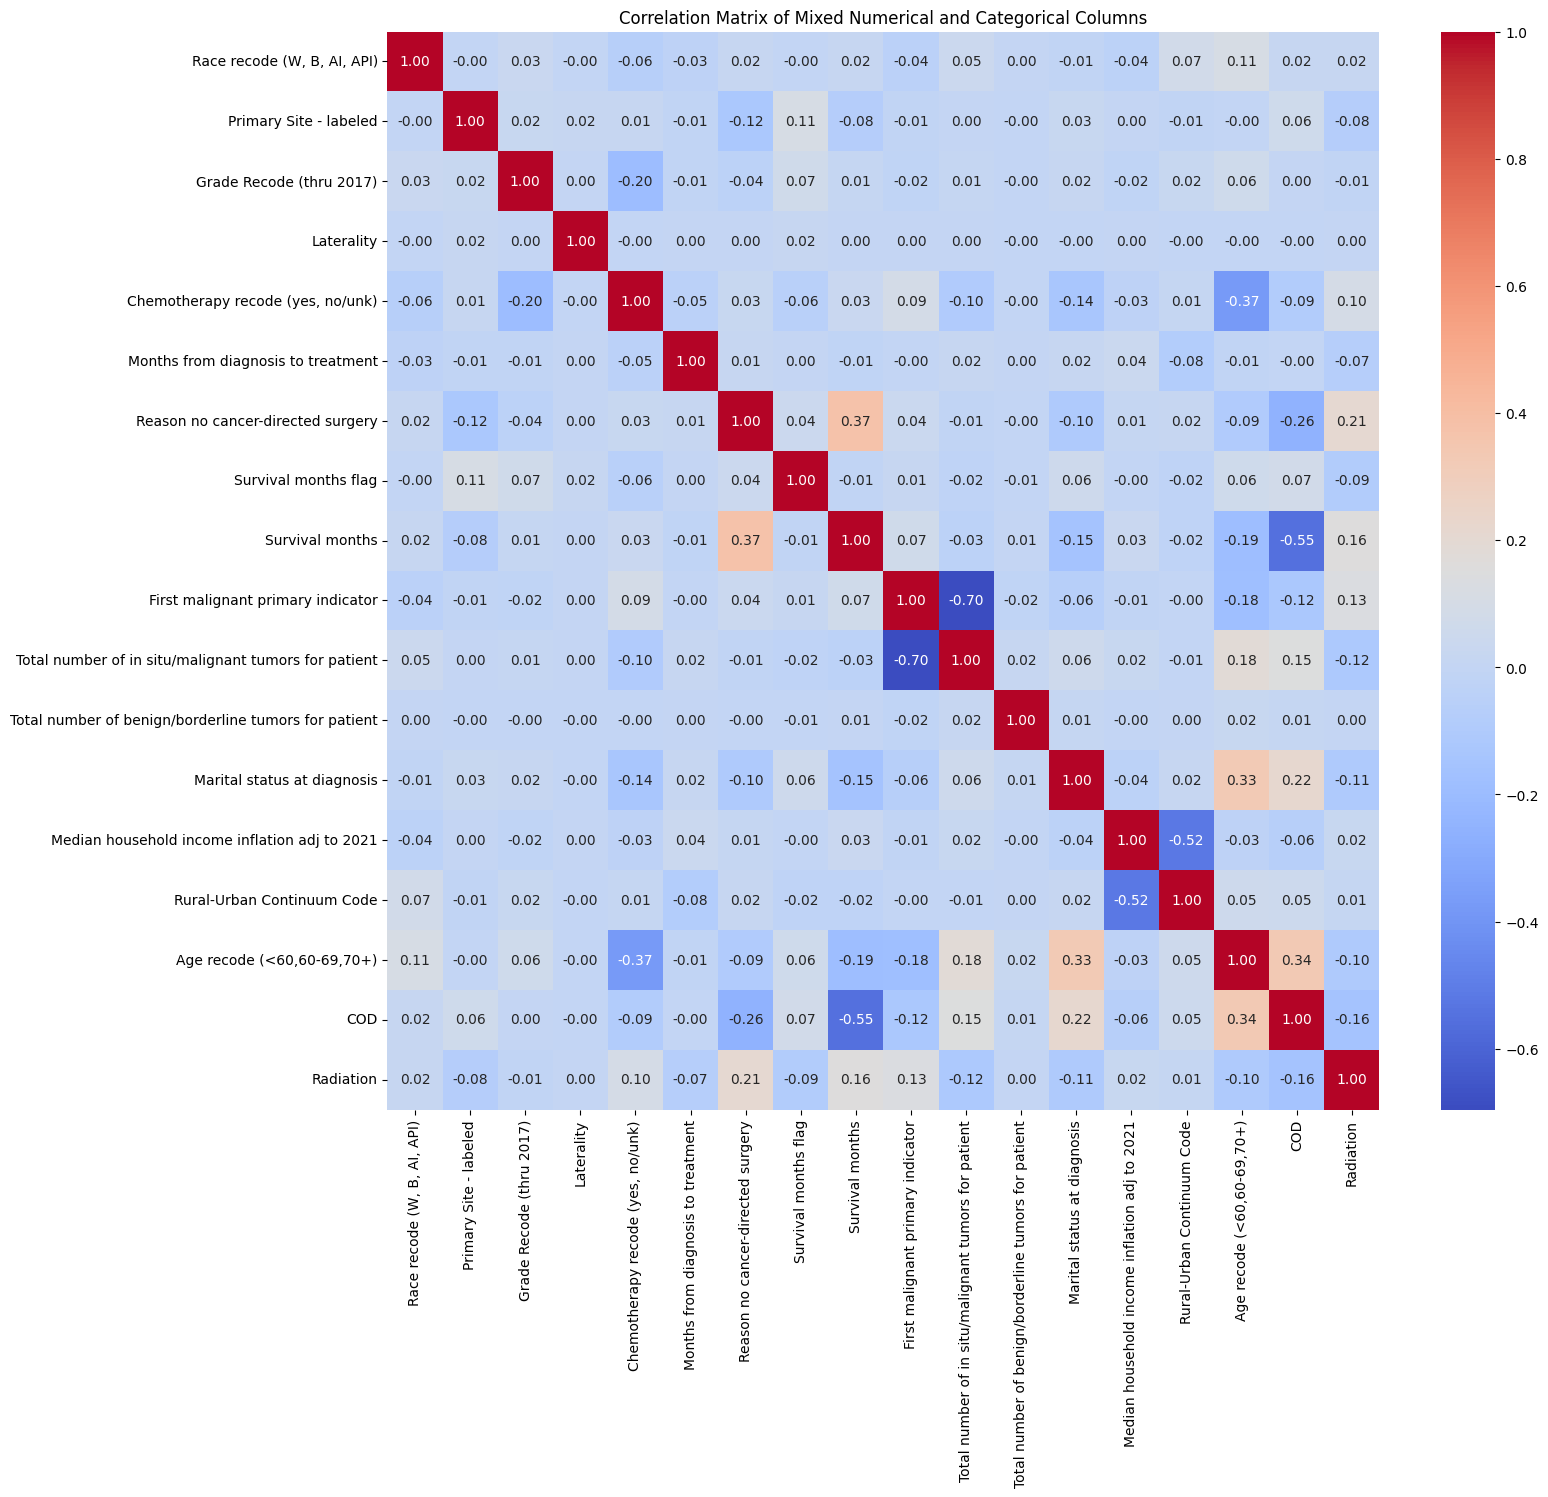

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, fisher_exact
from sklearn.preprocessing import LabelEncoder

def cramers_v(confusion_matrix):
    """Calculates Cramér's V statistic for categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# Check for variables with only one level
one_level_vars = []
for col in BREAST_DF_surv_clean.columns:
    if len(BREAST_DF_surv_clean[col].unique()) == 1:
        one_level_vars.append(col)


# 2. Numerical Columns Analysis
# Select numerical columns
numerical_cols = BREAST_DF_surv_clean.select_dtypes(include=np.number).columns

# Calculate Pearson correlation matrix
correlation_matrix_numeric = BREAST_DF_surv_clean[numerical_cols].corr(method='pearson')

# Plot heatmap of Pearson correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix of Numerical Columns")
plt.show()

# 3. Categorical Columns Analysis
# Select categorical columns
categorical_cols = BREAST_DF_surv_clean.select_dtypes(exclude=np.number).columns

# Handle missing values in categorical columns by filling with a placeholder (e.g., 'Missing')
for col in categorical_cols:
        if 'Missing' not in BREAST_DF_surv_clean[col].cat.categories:
            BREAST_DF_surv_clean[col] = BREAST_DF_surv_clean[col].cat.add_categories(['Missing'])
BREAST_DF_surv_clean[categorical_cols] = BREAST_DF_surv_clean[categorical_cols].fillna('Missing')

# Calculate Cramér's V for each pair of categorical columns
correlation_matrix_categorical = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
for col1 in categorical_cols:
    for col2 in categorical_cols:
        confusion_matrix = pd.crosstab(BREAST_DF_surv_clean[col1], BREAST_DF_surv_clean[col2])
        correlation_matrix_categorical.loc[col1, col2] = cramers_v(confusion_matrix)

# Convert the correlation matrix to numeric
correlation_matrix_categorical = correlation_matrix_categorical.apply(pd.to_numeric, errors='coerce')

# Plot heatmap of Cramér's V matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_categorical, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Matrix of Categorical Columns")
plt.show()

#4. Numerical and Categorical correlation
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of DataFrame for encoding
BREAST_DF_mixed = BREAST_DF_surv_clean.copy()

# Encode categorical columns in the mixed DataFrame
for col in categorical_cols:
    BREAST_DF_mixed[col] = label_encoder.fit_transform(BREAST_DF_mixed[col])

# Calculate correlation matrix for the mixed DataFrame
correlation_matrix_mixed = BREAST_DF_mixed.corr(method='pearson')

# Plot heatmap of the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix_mixed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Mixed Numerical and Categorical Columns")
plt.show()



## Machine learning, Random Forest classification model

To be able to work with this database, I need to transform the categorical data (factors) to numerical variables. A method known as one-hot encoding is used. Although for this survival analysis, target
encoding is the better method, I have decided not to apply that due to complexity and time constraints [1,2].

In general the machine learning phase consist of four main steps:

1.  Encode categorical variables.

2.  Split the data into training and testing sets.

3.  Train the models.

4.  Evaluate the models.

### What is target encoding:

Target encoding, also known as mean encoding or likelihood encoding, is a technique used to encode categorical variables into numerical values based on the target variable. It replaces each category with the mean
(or some other summary statistic) of the target variable for that category.

### What is One-Hot encoding:

One-hot encoding is a technique used in classification tasks to represent categorical variables, such as alive or deceased in the case of survival analysis, as binary vectors. In Python, this is achieved by converting each category into a binary vector where each element corresponds to a category, with a value of 1 indicating the presence of the category and 0 otherwise. This allows machine learning algorithms to effectively interpret and utilize categorical data in predictive models.

### Different models investigated in this Project

1.  **Random Forest :** Random forest is a popular machine learning algorithm that can be adapted for survival analysis. It constructs a multitude of decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

2.  **Logistic Regression :** Logistic regression, a foundational technique in survival analysis, is employed in this project to model the relationship between various prognostic factors and the probability of survival or death outcomes in breast cancer patients.

3.  **Deep Nueral Netweork (DNN):** This is a a powerful machine learning model that can learn complex patterns in data to classify individuals as either alive or deceased in a given classification problem. In R, DNNs can be implemented using packages like `keras`, providing a flexible framework for building and training deep learning models tailored to specific datasets. 

4.  **Gradient Boosting:** Gradient boosting is another machine learning algorithm that can be adapted for survival analysis. It builds an ensemble of decision trees sequentially, with each tree correcting the errors of the previous one.

### Data Preparation for Resemble models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Assuming BREAST_DF_surv_clean is already defined as a pandas DataFrame

# Drop rows with missing values
BREAST_DF_surv_clean_no_missing = BREAST_DF_surv_clean.dropna()

# Convert 'COD' to binomial (1 for 'Alive', 0 for 'Breast')
BREAST_DF_surv_clean_no_missing_bi = BREAST_DF_surv_clean_no_missing[
    BREAST_DF_surv_clean_no_missing['COD'] != "Other"]
BREAST_DF_surv_clean_no_missing_bi['COD'] = np.where(
    BREAST_DF_surv_clean_no_missing_bi['COD'] == "Alive", 1, 0)
BREAST_DF_surv_clean_no_missing_bi['COD'] = BREAST_DF_surv_clean_no_missing_bi['COD'].astype('category')

# Separate features (X) and target (y)
X = BREAST_DF_surv_clean_no_missing_bi.drop('COD', axis=1)
y = BREAST_DF_surv_clean_no_missing_bi['COD']

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Get feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(X.columns)

# Convert encoded data to DataFrame
design_matrix = pd.DataFrame(X_encoded, columns=feature_names)
design_matrix['COD'] = y.values  # Add target variable back
design_matrix['COD'] = design_matrix['COD'].astype('category')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    design_matrix.drop('COD', axis=1), design_matrix['COD'], test_size=0.3, random_state=123, stratify=design_matrix['COD']
)

# Combine training features and target
train_data = pd.concat([X_train, y_train], axis=1)

#print("Training Data:")
#print(train_data.head())


C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1924595654.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1924595654.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Training Data:
        Race recode (W, B, AI, API)_American Indian/Alaska Native  \
165131                                                0.0           
145121                                                0.0           
121508                                                0.0           
122355                                                0.0           
98103                                                 0.0           

        Race recode (W, B, AI, API)_Asian or Pacific Islander  \
165131                                                1.0       
145121                                                0.0       
121508                                                0.0       
122355                                                0.0       
98103                                                 0.0       

        Race recode (W, B, AI, API)_Black  \
165131                                0.0   
145121                                0.0   
121508                                0.0   

### Machine Learning: Random Forest

Random Forests are a powerful machine learning technique well-suited for survival analysis tasks like predicting patient survival in cancer cases. Random Forests don't rely on a single decision tree but on a multitude of them ("forest"). Each tree is built on a random subset of the data (with replacement) and uses a random selection of features at each split.

C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1169927468.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kohya\AppData\Local\Temp\ipykernel_3960\1169927468.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Confusion Matrix:
[[ 6770  2792]
 [ 1384 65434]]
Accuracy: 0.9453260015710919
Precision: 0.9590771846510128
Recall: 0.9792870184680774
F1 Score: 0.9690767453570688


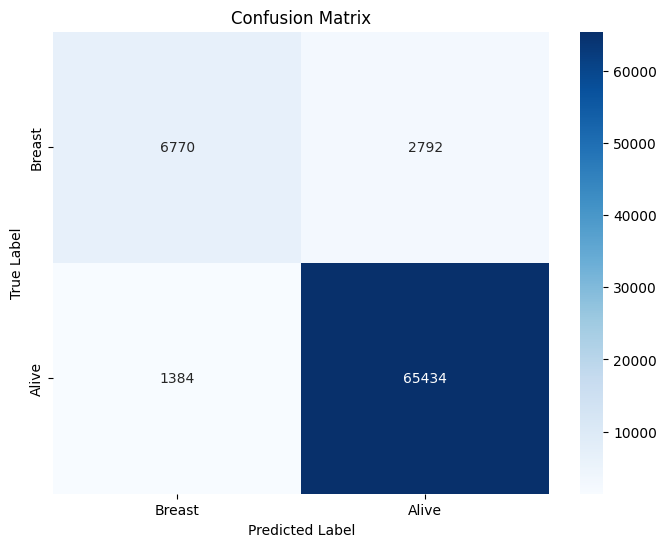

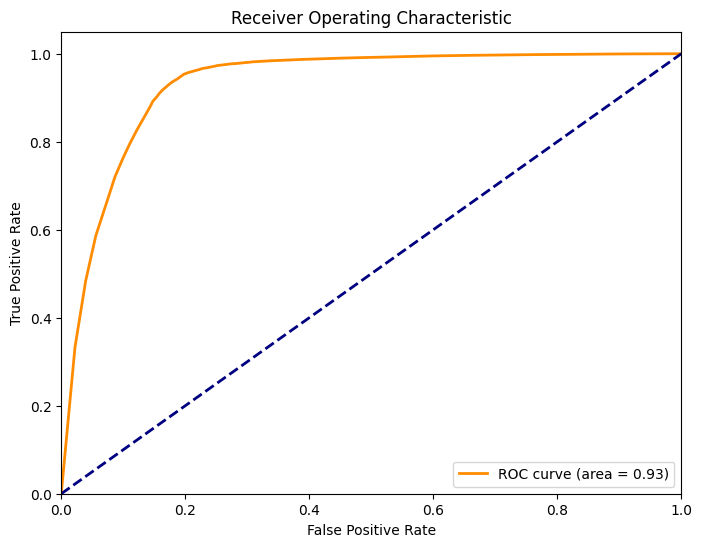

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows with missing values
BREAST_DF_surv_clean_no_missing = BREAST_DF_surv_clean.dropna()

# Convert 'COD' to binomial (1 for 'Alive', 0 for 'Breast')
# Remove "Other" from COD column
BREAST_DF_surv_clean_no_missing_bi = BREAST_DF_surv_clean_no_missing[BREAST_DF_surv_clean_no_missing['COD'] != "Other"]

# Replace remaining categories with numerical values
BREAST_DF_surv_clean_no_missing_bi['COD'] = np.where(BREAST_DF_surv_clean_no_missing_bi['COD'] == "Alive", 1, 0)

# Convert 'COD' to categorical
BREAST_DF_surv_clean_no_missing_bi['COD'] = BREAST_DF_surv_clean_no_missing_bi['COD'].astype('category')


# One-Hot Encoding for categorical variables
categorical_cols = BREAST_DF_surv_clean_no_missing_bi.select_dtypes(include=['category', 'object']).columns.tolist()
# Remove COD
if "COD" in categorical_cols:
    categorical_cols.remove("COD")

df_encoded = pd.get_dummies(BREAST_DF_surv_clean_no_missing_bi, columns=categorical_cols, drop_first=False)  # drop_first to avoid multicollinearity

# Separate features (X) and target (y)
X = df_encoded.drop(['COD'], axis=1, errors='ignore') # drop COD
y = df_encoded['COD'].astype(int)  # Convert 'COD' to integers

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Fit the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=123, class_weight='balanced')  # Add class_weight to handle imbalanced data
model_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
precision = conf_matrix[1,1] / sum(conf_matrix[:,1])
recall = conf_matrix[1,1] / sum(conf_matrix[1,:])
f1_score = 2*precision*recall / (precision + recall)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Breast', 'Alive'], yticklabels=['Breast', 'Alive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Get predicted probabilities for class 1 (Alive)
predictions_rf_probs = model_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_rf_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Machine Learning: GBM Model
OK. You have two options:

    Extreme Gradient Boosting XGBoost: A highly optimized gradient boosting algorithm that often outperforms other methods.

    Light Gradient Boosting Machine LightGBM: Another gradient boosting framework that's known for its speed and efficiency.

Here's how you can implement XGBoost.

c:\Users\kohya\OneDrive\Koohyar\ML program\MSAI-TX\AI In Health Care\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Confusion Matrix:
[[ 6964  2598]
 [ 1427 65391]]


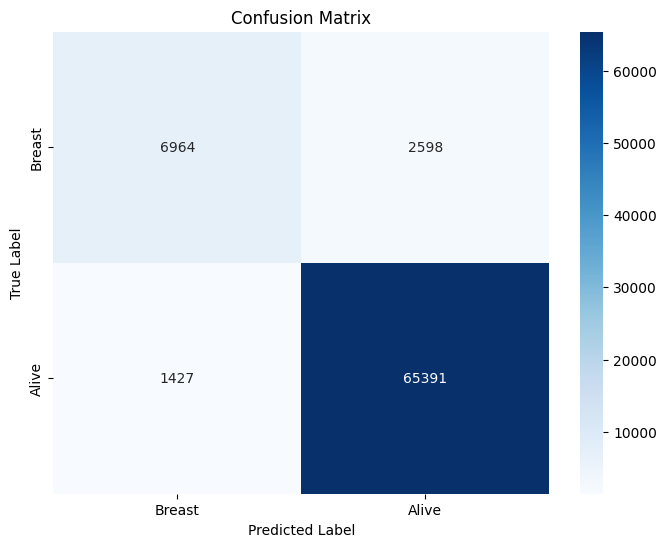

Accuracy: 0.9473
Precision: 0.9618
Recall: 0.9786
F1 Score: 0.9701


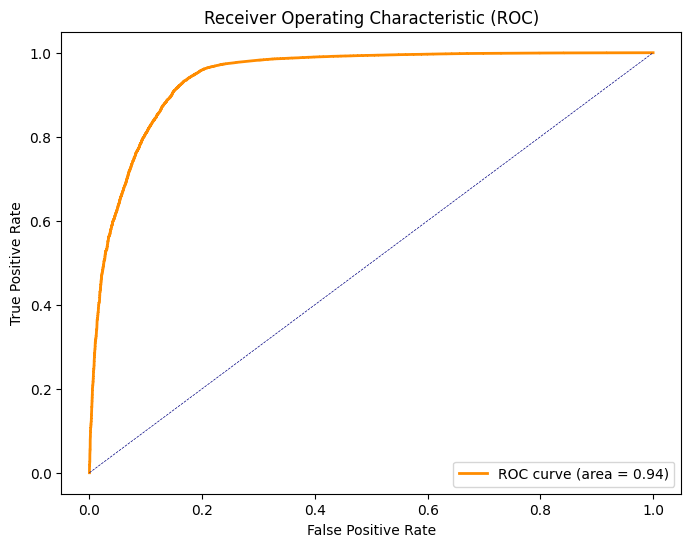

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming BREAST_DF_surv_clean_no_missing_bi is already defined

# Separate features and target variable
X = BREAST_DF_surv_clean_no_missing_bi.drop('COD', axis=1)
y = BREAST_DF_surv_clean_no_missing_bi['COD'].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough')

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data
X_test = preprocessor.transform(X_test)

# Initialize and train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Breast', 'Alive'], yticklabels=['Breast', 'Alive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()




### Machine Learning: Logistic Regression
Logistic regression is a statistical model used to analyze the relationship between a binary outcome variable and one or more independent variables. It estimates the probability of the outcome variable being in a particular category (usually coded as 0 or 1) based on the values of the independent variables. The model employs the logistic function to constrain the predicted probabilities between 0 and 1, making it suitable for binary classification tasks like survival/death analyses in our case. In R, logistic regression can be implemented using the glm() function with a binomial family distribution.

Confusion Matrix:
[[ 5742  3820]
 [ 1522 65296]]


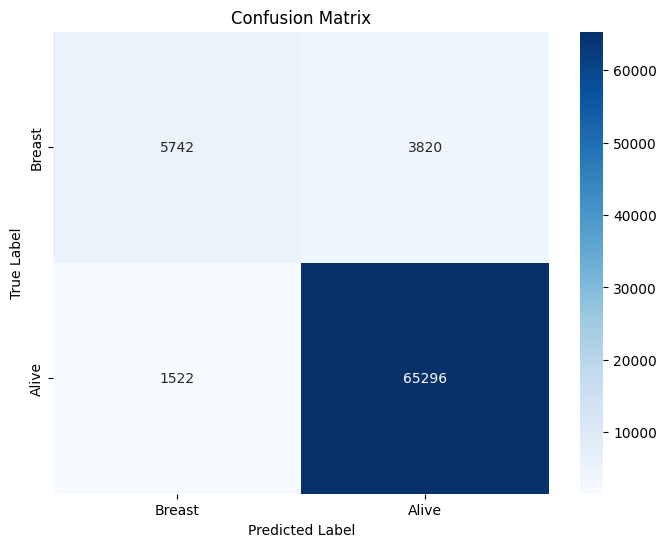

Accuracy: 0.9301
Precision: 0.9447
Recall: 0.9772
F1 Score: 0.9607


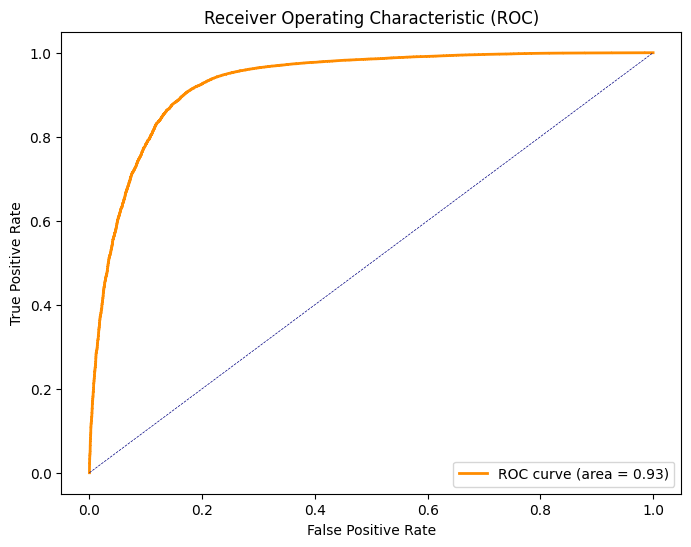

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming BREAST_DF_surv_clean_no_missing_bi is already defined

# Separate features and target variable
X = BREAST_DF_surv_clean_no_missing_bi.drop('COD', axis=1)
y = BREAST_DF_surv_clean_no_missing_bi['COD'].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough')

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data
X_test = preprocessor.transform(X_test)

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Breast', 'Alive'], yticklabels=['Breast', 'Alive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Deep Nueral Network (DNN)

A Deep Neural Network (DNN) for survival analysis is a powerful machine learning model designed to capture complex patterns in survival data and predict the likelihood of an event occurring (e.g., death) over a given period. In binary classification tasks, such as survival outcomes (alive vs. deceased), a DNN consists of multiple layers of interconnected neurons that process input features to estimate the probability of an individual experiencing the event of interest.

DNNs can incorporate various architectures, including Convolutional Neural Networks (CNNs) for spatial data analysis and Recurrent Neural Networks (RNNs) for sequential data modeling. These networks are trained using optimization algorithms like Stochastic Gradient Descent (SGD) or Adam, which adjust model weights iteratively to minimize prediction errors.

In Python, deep neural networks for survival analysis can be implemented using libraries such as TensorFlow and Keras, offering flexibility in model design, hyperparameter tuning, and performance optimization. These frameworks enable the integration of advanced techniques like dropout regularization and batch normalization, improving model generalization and predictive accuracy.

c:\Users\kohya\OneDrive\Koohyar\ML program\MSAI-TX\AI In Health Care\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


2387/2387 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Confusion Matrix:
[[ 6722  2840]
 [ 1332 65486]]


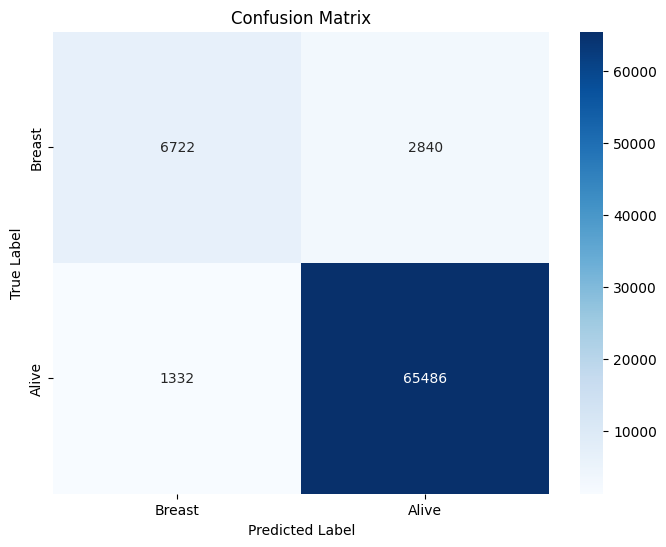

Accuracy: 0.9454
Precision: 0.9584
Recall: 0.9801
F1 Score: 0.9691


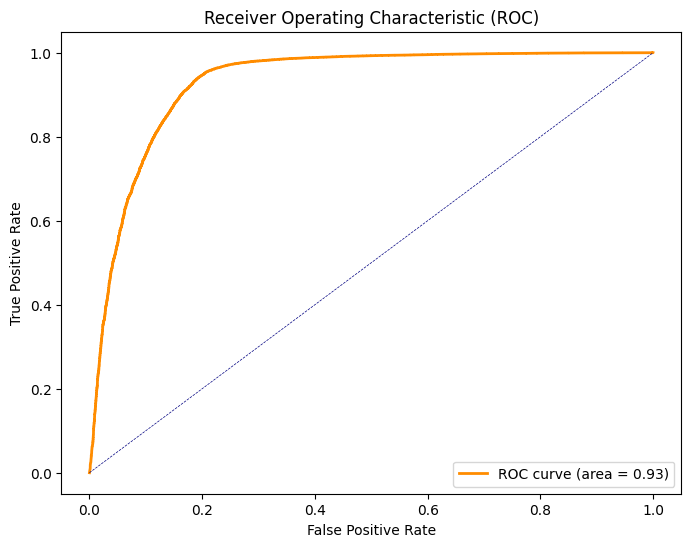

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming BREAST_DF_surv_clean_no_missing_bi is already defined

# Separate features and target variable
X = BREAST_DF_surv_clean_no_missing_bi.drop('COD', axis=1)
y = BREAST_DF_surv_clean_no_missing_bi['COD'].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough')

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data
X_test = preprocessor.transform(X_test)

# Get the number of features
n_features = X_train.shape[1]

# Define the DNN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(n_features,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = np.round(y_pred_prob)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Breast', 'Alive'], yticklabels=['Breast', 'Alive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



## Conclusion:

In this project, I aimed for prediction of the survival rate of patients with breast cancer with more than 96% accuracy knowing the survival rate is 75%. The goal was to use machine learning and available resources and the techniques learned in class and other avaulbe source to deal with this complex problem. I utilized the SEER database spanning from 2011 to 2015, comprising over 300,000 cases, to predict the survival rate of cancer patients based on 16 critical indicators, including race, household income, cancer type, treatment, time to treatment, number of tumors, and more. Preliminary exploratory data analysis was conducted to identify these key indicators from a pool of 36, followed by data cleaning and organization for machine learning tasks. Various Python Libraries were employed for data cleaning, type conversion, handling missing values, and database organization. Additionally, correlation analyses using tools like matplotlibs, chi-square, Fisher test, and other complex Python libraries were performed to explore correlations between numeric and categorical variables and the target parameter of interest, Alive/Death (COD).

Initially, the intention was to include all three categories of Alive/Death/Other, but it was later recognized that the inclusion of the "Other" category rendered the analysis irrelevant. Therefore, the
analysis was focused solely on Alive/Death, as breast cancer was the primary cause of death even if patients had other conditions.

A range of machine learning algorithms were applied, starting from Logistic Regression and Random Forest and DNN. Overall, the project demonstrated that even individuals with limited domain knowledge can utilize available resources to predict cancer patient outcomes with approximately 94.5% accuracy. However, further endeavors, such as stratification, parameter importance implication, and additional data gathering, could enhance accuracy, offering significant contributions to the healthcare industry, patient care, and family circumstances.

Despite the complexities associated with managing different packages and large databases, I enjoyed exploring new concepts and learning how different methods can be employed. Particularly, I gained insights into
the significance of encoding and its impact on survival model performance. While this analysis lacks the rigor of academic research, it underscores the potential of machine learning in addressing complex
problems, paving the way for future exploration and study. 

In summary, among the developed models, Logistic Regression emerged as the simplest and fastest, achieving 93% accuracy, followed by RandomForest. Other methods such as GBM proved challenging and demanded a deeper understanding of the methodology. Additionally, neural networks exhibited success but were time-consuming and presented black-box risks. For future iterations, I would opt to focus on Logistic Regression and RandomForest, dedicating more time to encoding, data preparation, and exploring stratification and parameter stress testing to potentially enhance accuracy.

This project explored the feasibility of predicting breast cancer patient survival rates using machine learning. While achieving a target accuracy of over 96% proved challenging, a Logistic Regression model achieved a promising 93% accuracy on data spanning 2011-2015 from the SEER database (300,000+ cases).

The project successfully identified 16 critical factors influencing survival from a pool of 36 through exploratory data analysis. Machine learning techniques (data cleaning, feature engineering) were implemented using Python to prepare the data for various algorithms, including Logistic Regression, Random Forests, and Deep Neural Networks (DNNs). 

The analysis excluded the initially considered "Other" outcome category due to its limited relevance to breast cancer-specific survival.

This project highlights the potential of machine learning for patient survival prediction, even for individuals with limited domain knowledge.
However, further research is needed to:

-   **Enhance Accuracy:** Techniques like stratification, parameter importance analysis, and additional data acquisition can be explored.
-   **Improve Generalizability:** Future studies could benefit from more diverse datasets and address the limitations of retrospective analysis.
-   **Mitigate Black-Box Risks:** While DNNs offered promise, further exploration is required to understand their inner workings and enhance interpretability.

By addressing these limitations, future studies can contribute significantly to personalized medicine, patient care planning, and supporting families facing this challenging diagnosis.

## Acknowledgement:

I would like to thank the professors Ding, TAs, as well as the students in the classes, who made the courses interesting and challenging. I have learned a lot and dealt with many challenges throughout these courses, despite having little specific background in Healt Care Related Topic beforehand. The course content was carefully chosen to help students like me develop an understanding of the topic and find enjoyment in the learning process.

## References:

[1] SEER (<https://seer.cancer.gov/data/access.html>)

[2] [zgalochkina/SEER_solid_tumor: R code for SEER data analysis of
solid tumor in different populations
(github.com)](https://github.com/zgalochkina/SEER_solid_tumor)

[3] [XAI_Healthcare_eXplainable_AI_in_Healthcare.pdf
(upc.edu)](https://upcommons.upc.edu/bitstream/handle/2117/390006/XAI_Healthcare_eXplainable_AI_in_Healthcare.pdf?sequence=1)

[4] Pargen, F., Pfisterer, F., Thomas, J., Bischl, B.: Regularized
target encoding out performs traditional methods in supervised machine
learning with high cardinality features. Computational Statistics 37(5),
2671–2692 (Nov 2022)

[5] American Cancer Society - Breast Cancer Survival Rates
